In [1]:
# A typical organization loses an estimated 5% of its yearly revenue to fraud. In this course, learn to fight fraud by using data. 

# Apply supervised learning algorithms to detect fraudulent behavior based upon past fraud, and use unsupervised learning methods to discover new types of fraud activities.

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [442]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from pprint import pprint as pp
import csv
from pathlib import Path
import seaborn as sns
from itertools import product
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline 

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score, f1_score
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import MiniBatchKMeans, DBSCAN

import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary

from typing import List, Tuple

In [4]:
pd.set_option('display.max_columns', 700)
pd.set_option('display.max_rows', 400)
pd.set_option('display.min_rows', 10)
pd.set_option('display.expand_frame_repr', True)

In [482]:
data = Path.cwd() / 'data' 

ch1 = data / 'chapter_1'
cc1_file = ch1 / 'creditcard_sampledata.csv'
cc3_file = ch1 / 'creditcard_sampledata_3.csv'

ch2 = data / 'chapter_2'
cc2_file = ch2 / 'creditcard_sampledata_2.csv'

ch3 = data / 'chapter_3'
banksim_file = ch3 / 'banksim.csv'
banksim_adj_file = ch3 / 'banksim_adj.csv'
db_full_file = ch3 / 'db_full.pickle'
labels_file = ch3 / 'labels.pickle'
labels_full_file = ch3 / 'labels_full.pickle'
x_scaled_file = ch3 / 'x_scaled.pickle'
x_scaled_full_file = ch3 / 'x_scaled_full.pickle'

ch4 = data / 'chapter_4'
enron_emails_clean_file = ch4 / 'enron_emails_clean.csv'
cleantext_file = ch4 / 'cleantext.pickle'
corpus_file = ch4 / 'corpus.pickle'
dict_file = ch4 / 'dict.pickle'
ldamodel_file = ch4 / 'ldamodel.pickle'

In [6]:
df = pd.read_csv(cc3_file)
df

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,258647,1.725265,-1.337256,-1.012687,-0.361656,-1.431611,-1.098681,-0.842274,-0.026594,-0.032409,0.215113,1.618952,-0.654046,-1.442665,-1.546538,-0.230008,1.785539,1.419793,0.071666,0.233031,0.275911,0.414524,0.793434,0.028887,0.419421,-0.367529,-0.155634,-0.015768,0.010790,189.00,0
1,69263,0.683254,-1.681875,0.533349,-0.326064,-1.455603,0.101832,-0.520590,0.114036,-0.601760,0.444011,1.521570,0.499202,-0.127849,-0.237253,-0.752351,0.667190,0.724785,-1.736615,0.702088,0.638186,0.116898,-0.304605,-0.125547,0.244848,0.069163,-0.460712,-0.017068,0.063542,315.17,0
2,96552,1.067973,-0.656667,1.029738,0.253899,-1.172715,0.073232,-0.745771,0.249803,1.383057,-0.483771,-0.782780,0.005242,-1.273288,-0.269260,0.091287,-0.347973,0.495328,-0.925949,0.099138,-0.083859,-0.189315,-0.426743,0.079539,0.129692,0.002778,0.970498,-0.035056,0.017313,59.98,0
3,281898,0.119513,0.729275,-1.678879,-1.551408,3.128914,3.210632,0.356276,0.920374,-0.160589,-0.801748,0.137341,-0.156740,-0.429388,-0.752392,0.155272,0.215068,0.352222,-0.376168,-0.398920,0.043715,-0.335825,-0.906171,0.108350,0.593062,-0.424303,0.164201,0.245881,0.071029,0.89,0
4,86917,1.271253,0.275694,0.159568,1.003096,-0.128535,-0.608730,0.088777,-0.145336,0.156047,0.022707,-0.963306,-0.228074,-0.324933,0.390609,1.065923,0.285930,-0.627072,0.170175,-0.215912,-0.147394,0.031958,0.123503,-0.174528,-0.147535,0.735909,-0.262270,0.015577,0.015955,6.53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5045,223366,1.118331,2.074439,-3.837518,5.448060,0.071816,-1.020509,-1.808574,0.521744,-2.032638,-2.732792,3.274075,-3.541687,-0.946820,-7.555729,-1.767005,-0.642333,-2.114429,0.183327,-1.177793,0.163513,0.289861,-0.172718,-0.021910,-0.376560,0.192817,0.114107,0.500996,0.259533,1.00,1
5046,239499,-2.150855,2.187917,-3.430516,0.119476,-0.173210,0.290700,-2.808988,-2.679351,-0.556685,-4.485483,1.903999,-2.644219,-0.982273,-4.691151,-0.693080,-2.553251,-3.483436,-0.064852,1.490329,0.532145,-0.073205,0.561496,-0.075034,-0.437619,0.353841,-0.521339,0.144465,0.026588,50.00,1
5047,125342,-7.139060,2.773082,-6.757845,4.446456,-5.464428,-1.713401,-6.485365,3.409395,-3.053493,-6.260706,2.394168,-6.163537,0.602851,-5.606346,0.206622,-6.525081,-11.408368,-4.693978,2.431274,-0.616949,1.303250,-0.016118,-0.876670,0.382230,-1.054624,-0.614606,-0.766848,0.409424,106.90,1
5048,220725,-1.169203,1.863414,-2.515135,5.463681,-0.297971,1.364918,0.759219,-0.118861,-2.293921,-0.423784,2.375876,-3.244827,-0.556619,-5.152475,0.050906,-1.022045,-1.646505,0.126460,1.819013,-0.299374,-0.393090,-0.708692,0.471309,-0.078616,-0.544655,0.014777,-0.240930,-0.781055,324.59,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5050 non-null   int64  
 1   V1          5050 non-null   float64
 2   V2          5050 non-null   float64
 3   V3          5050 non-null   float64
 4   V4          5050 non-null   float64
 5   V5          5050 non-null   float64
 6   V6          5050 non-null   float64
 7   V7          5050 non-null   float64
 8   V8          5050 non-null   float64
 9   V9          5050 non-null   float64
 10  V10         5050 non-null   float64
 11  V11         5050 non-null   float64
 12  V12         5050 non-null   float64
 13  V13         5050 non-null   float64
 14  V14         5050 non-null   float64
 15  V15         5050 non-null   float64
 16  V16         5050 non-null   float64
 17  V17         5050 non-null   float64
 18  V18         5050 non-null   float64
 19  V19         5050 non-null  

In [8]:
# Count the occurrences of fraud and no fraud and print them
occ = df['Class'].value_counts()
occ

Class
0    5000
1      50
Name: count, dtype: int64

In [9]:
# Print the ratio of fraud cases
ratio_cases = occ/len(df.index)
print(f'Ratio of fraudulent cases: {ratio_cases[1]}\nRatio of non-fraudulent cases: {ratio_cases[0]}')

Ratio of fraudulent cases: 0.009900990099009901
Ratio of non-fraudulent cases: 0.9900990099009901


In [10]:
# Data visualization

def prep_data(df: pd.DataFrame) -> (np.ndarray, np.ndarray):
    """
    Convert the DataFrame into two variable
    X: data columns (V1 - V28)
    y: lable column
    """
    X = df.iloc[:, 1:29].values
    y = df.Class.values
    return X, y

In [11]:
# Create X and y from the prep_data function 
X, y = prep_data(df)
X, y

(array([[ 1.72526466e+00, -1.33725592e+00, -1.01268723e+00, ...,
         -1.55634495e-01, -1.57676763e-02,  1.07902703e-02],
        [ 6.83253845e-01, -1.68187486e+00,  5.33349336e-01, ...,
         -4.60711621e-01, -1.70682293e-02,  6.35420640e-02],
        [ 1.06797296e+00, -6.56667445e-01,  1.02973756e+00, ...,
          9.70497826e-01, -3.50555792e-02,  1.73125091e-02],
        ...,
        [-7.13906007e+00,  2.77308160e+00, -6.75784507e+00, ...,
         -6.14606037e-01, -7.66848112e-01,  4.09423944e-01],
        [-1.16920341e+00,  1.86341354e+00, -2.51513548e+00, ...,
          1.47767561e-02, -2.40929959e-01, -7.81055196e-01],
        [-8.46184470e+00,  6.86619841e+00, -1.18382692e+01, ...,
         -2.57283693e-01,  1.17002652e+00,  2.29300915e-01]]),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64))

In [12]:
# Define a function to create a scatter plot of our data and labels
def plot_data(X: np.ndarray, y: np.ndarray):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

In [13]:
X[y == 1, 0].shape

(50,)

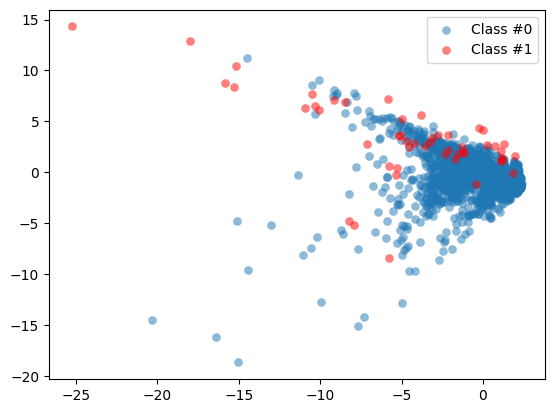

In [14]:
# By visualizing the data (e.g. a scatterplot with feature V2 against feature V3 --- X = df.iloc[:, 2:30].values ---), you can immediately see how our fraud cases are scattered over our data, and how few cases we have. A picture often makes the imbalance problem clear. 

# Plot our data by running our plot data function on X and y
plot_data(X, y)

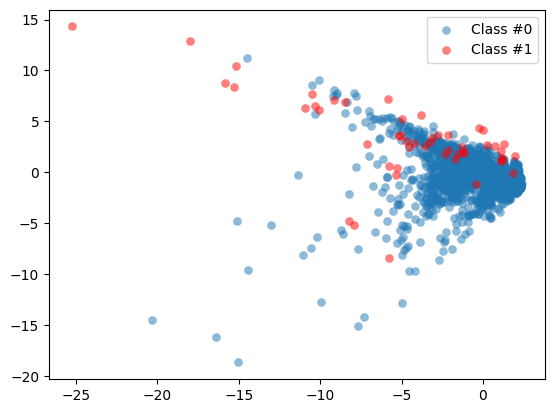

In [15]:
# another way to reproduce the scatterplot, using the dataframe, without a function

plt.scatter(df.V1[df.Class == 0], df.V2[df.Class == 0], label="Class #0", alpha=0.5, linewidth=0.15)
plt.scatter(df.V1[df.Class == 1], df.V2[df.Class == 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
plt.legend()
plt.show()

In [16]:
df.corr()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Unnamed: 0,1.000000,0.122651,-0.005127,-0.332019,-0.112379,0.199591,-0.073591,0.091530,-0.009454,-0.002374,0.024088,-0.255874,0.111244,-0.072987,-0.041741,-0.184469,0.040765,-0.030567,0.100969,0.032116,-0.070775,0.058832,0.123081,0.059779,-0.002578,-0.232508,-0.012469,0.023522,-0.010439,-0.035950,-0.026022
V1,0.122651,1.000000,-0.208046,0.112920,-0.044880,0.124098,0.009994,0.189397,0.000990,0.053254,0.169756,-0.099003,0.172904,0.012466,0.140318,0.022339,0.143973,0.215040,0.100897,-0.028372,-0.037577,0.020187,-0.031568,-0.035292,0.010977,0.027121,0.012281,0.063151,0.023628,-0.166388,-0.254561
V2,-0.005127,-0.208046,1.000000,-0.158028,0.130166,-0.035907,-0.089209,-0.145099,0.016342,-0.046163,-0.158653,0.089322,-0.146510,0.000914,-0.121532,-0.003332,-0.087119,-0.169599,-0.078032,0.039822,-0.015424,-0.013372,0.006442,0.040665,0.017742,0.023787,0.001233,0.028788,-0.046172,-0.536444,0.210337
V3,-0.332019,0.112920,-0.158028,1.000000,-0.148049,0.127841,0.100184,0.310937,-0.072739,0.133084,0.260534,-0.158629,0.269694,0.012923,0.237924,-0.004468,0.240505,0.317329,0.165313,-0.073747,-0.058751,-0.015989,-0.023994,-0.018938,0.015487,0.013147,-0.015003,-0.024336,0.013432,-0.138791,-0.429185
V4,-0.112379,-0.044880,0.130166,-0.148049,1.000000,-0.120720,-0.016338,-0.175523,0.025944,-0.064791,-0.167784,0.107328,-0.201095,-0.017276,-0.187881,-0.018925,-0.143743,-0.215674,-0.109765,0.005403,0.020224,0.031084,0.009375,0.017811,0.026648,-0.021581,0.007397,0.000937,-0.007689,0.079917,0.323109
V5,0.199591,0.124098,-0.035907,0.127841,-0.120720,1.000000,0.135528,0.376758,-0.072305,0.094999,0.151376,-0.131697,0.154244,-0.009681,0.163444,0.002837,0.194369,0.222580,0.105951,-0.040304,-0.110984,-0.017983,-0.016458,-0.019905,-0.011324,0.007643,0.006196,0.051520,0.005765,-0.313230,-0.248258
V6,-0.073591,0.009994,-0.089209,0.100184,-0.016338,0.135528,1.000000,-0.051967,-0.061443,0.054832,0.093154,-0.035264,0.093258,-0.003992,0.079393,-0.044052,0.038924,0.084056,0.024815,-0.019185,0.058000,-0.024506,0.021131,-0.009041,-0.024835,0.001728,0.024237,-0.054983,0.022522,0.173940,-0.123232
V7,0.091530,0.189397,-0.145099,0.310937,-0.175523,0.376758,-0.051967,1.000000,0.022811,0.160621,0.304431,-0.176625,0.282560,-0.021457,0.246867,0.009117,0.221271,0.354210,0.197997,-0.054091,0.026326,0.066261,-0.067929,-0.054998,-0.012117,0.001590,-0.000506,-0.097223,0.044668,0.229487,-0.428502
V8,-0.009454,0.000990,0.016342,-0.072739,0.025944,-0.072305,-0.061443,0.022811,1.000000,-0.037496,-0.057853,0.052944,-0.078501,0.017846,-0.092278,0.021727,-0.070840,-0.099891,-0.048531,0.030812,-0.082378,0.176889,-0.047397,-0.074132,0.011109,-0.001399,0.017863,0.050930,-0.013709,-0.072381,0.106072
V9,-0.002374,0.053254,-0.046163,0.133084,-0.064791,0.094999,0.054832,0.160621,-0.037496,1.000000,0.133418,-0.082669,0.138588,-0.004680,0.126764,-0.009240,0.106317,0.169082,0.085057,-0.038142,0.003754,0.007479,-0.003649,-0.017762,0.029418,0.010523,0.016378,-0.082413,-0.020875,-0.029261,-0.221299


In [17]:
# Implement resampling methods using Python imblean module
# compatible with scikit-learn

from imblearn.over_sampling import RandomOverSampler

method = RandomOverSampler()
X_resampled, y_resampled = method.fit_resample(X, y)



In [18]:
# duplicated rows on the original dataframe (not sure why we have some)

print('X shape', X.shape)
print('number of unique rows in the original X:', pd.DataFrame(X).drop_duplicates(keep=False).shape[0])
print('number of y=0 in the unique rows of the original X:',np.sum(y[pd.DataFrame(X).drop_duplicates(keep=False).index]==0))
print('number of y=1 in the unique rows of the original X:',np.sum(y[pd.DataFrame(X).drop_duplicates(keep=False).index]==1))

print('number of duplicated rows in the original X:', pd.DataFrame(X).duplicated(keep = False).sum())
print('number of unique duplicated rows in the original X:', pd.DataFrame(X)[pd.DataFrame(X).duplicated(keep = False)].drop_duplicates().shape[0])
print('number of y=0 in the duplicated rows of the original X:', np.sum(y[pd.DataFrame(X)[pd.DataFrame(X).duplicated(keep = False)==True].index]==0))
print('number of y=1 in the duplicated rows of the original X:', np.sum(y[pd.DataFrame(X)[pd.DataFrame(X).duplicated(keep = False)==True].index]==1))


pd.DataFrame(X)[pd.DataFrame(X).duplicated(keep = False)].sort_values(0)

X shape (5050, 28)
number of unique rows in the original X: 5037
number of y=0 in the unique rows of the original X: 4987
number of y=1 in the unique rows of the original X: 50
number of duplicated rows in the original X: 13
number of unique duplicated rows in the original X: 6
number of y=0 in the duplicated rows of the original X: 13
number of y=1 in the duplicated rows of the original X: 0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
1523,0.879295,0.001973,-0.094510,1.264449,0.544229,0.705941,0.168938,0.193764,1.159581,-0.522916,1.606485,-2.525081,0.167830,2.430276,1.171046,-1.531022,1.822531,-1.961324,-2.152379,-0.232132,0.037570,0.273465,-0.036151,-0.708290,0.389360,-0.232611,0.009744,0.007320
3394,0.879295,0.001973,-0.094510,1.264449,0.544229,0.705941,0.168938,0.193764,1.159581,-0.522916,1.606485,-2.525081,0.167830,2.430276,1.171046,-1.531022,1.822531,-1.961324,-2.152379,-0.232132,0.037570,0.273465,-0.036151,-0.708290,0.389360,-0.232611,0.009744,0.007320
1971,1.188603,0.135141,0.597976,0.565232,-0.587187,-0.797991,-0.071105,-0.036635,-0.131316,0.118542,1.555138,0.780820,-0.452565,0.578836,0.388500,0.470979,-0.562191,-0.032607,0.095655,-0.115698,-0.195399,-0.651219,0.150735,0.512968,0.135490,0.065871,-0.038206,0.010774
3402,1.188603,0.135141,0.597976,0.565232,-0.587187,-0.797991,-0.071105,-0.036635,-0.131316,0.118542,1.555138,0.780820,-0.452565,0.578836,0.388500,0.470979,-0.562191,-0.032607,0.095655,-0.115698,-0.195399,-0.651219,0.150735,0.512968,0.135490,0.065871,-0.038206,0.010774
3864,1.315362,-0.207586,-1.118486,-0.745058,1.934506,3.365860,-0.603665,0.830079,0.298760,-0.172062,-0.261106,0.211264,-0.086437,0.197643,0.488952,0.225312,-0.574352,-0.241540,0.605146,0.017142,-0.301681,-0.903861,0.028991,1.034757,0.484800,0.460971,-0.040978,0.003608
4572,1.315362,-0.207586,-1.118486,-0.745058,1.934506,3.365860,-0.603665,0.830079,0.298760,-0.172062,-0.261106,0.211264,-0.086437,0.197643,0.488952,0.225312,-0.574352,-0.241540,0.605146,0.017142,-0.301681,-0.903861,0.028991,1.034757,0.484800,0.460971,-0.040978,0.003608
285,1.315404,-0.033577,-1.089984,-0.557087,2.029931,3.268130,-0.534994,0.808250,-0.052724,0.001149,-0.028609,0.073657,0.041285,0.425500,1.245277,0.640368,-0.910237,-0.068698,0.255268,0.016952,-0.313307,-1.068934,0.103797,0.992126,0.369398,0.110374,-0.028302,0.011836
2785,1.315404,-0.033577,-1.089984,-0.557087,2.029931,3.268130,-0.534994,0.808250,-0.052724,0.001149,-0.028609,0.073657,0.041285,0.425500,1.245277,0.640368,-0.910237,-0.068698,0.255268,0.016952,-0.313307,-1.068934,0.103797,0.992126,0.369398,0.110374,-0.028302,0.011836
3710,2.040578,-0.146368,-2.955721,-0.578510,2.609546,3.142573,-0.417135,0.784442,0.359925,-0.350987,0.329648,0.183500,-0.272952,-0.597480,0.583873,0.178651,0.473893,-0.498889,-0.140038,-0.121101,-0.352449,-0.996836,0.363652,0.604817,-0.264490,0.219691,-0.039174,-0.042820
4509,2.040578,-0.146368,-2.955721,-0.578510,2.609546,3.142573,-0.417135,0.784442,0.359925,-0.350987,0.329648,0.183500,-0.272952,-0.597480,0.583873,0.178651,0.473893,-0.498889,-0.140038,-0.121101,-0.352449,-0.996836,0.363652,0.604817,-0.264490,0.219691,-0.039174,-0.042820


In [19]:

print('X_resampled shape', X_resampled.shape)
print('number of unique rows in the X_resampled:', pd.DataFrame(X_resampled).drop_duplicates(keep=False).shape[0])
print('number of y=0 in the unique rows of the X_resampled:',np.sum(y[pd.DataFrame(X_resampled).drop_duplicates(keep=False).index]==0))
print('number of y=1 in the unique rows of the X_resampled:',np.sum(y[pd.DataFrame(X_resampled).drop_duplicates(keep=False).index]==1))

print('number of duplicated rows in the X_resampled:', pd.DataFrame(X_resampled).duplicated(keep = False).sum())
print('number of unique duplicated rows in the X_resampled:', pd.DataFrame(X_resampled)[pd.DataFrame(X_resampled).duplicated(keep = False)].drop_duplicates().shape[0])
print('number of y_resampled=0 in the duplicated rows of the X_resampled:', np.sum(y_resampled[pd.DataFrame(X_resampled)[pd.DataFrame(X_resampled).duplicated(keep = False)==True].index]==0))
print('number of y_resampled=1 in the duplicated rows of the X_resampled:', np.sum(y_resampled[pd.DataFrame(X_resampled)[pd.DataFrame(X_resampled).duplicated(keep = False)==True].index]==1))

pd.DataFrame(X_resampled)[pd.DataFrame(X_resampled).duplicated(keep = False)].sort_values(0)

X_resampled shape (10000, 28)
number of unique rows in the X_resampled: 4987
number of y=0 in the unique rows of the X_resampled: 4987
number of y=1 in the unique rows of the X_resampled: 0
number of duplicated rows in the X_resampled: 5013
number of unique duplicated rows in the X_resampled: 56
number of y_resampled=0 in the duplicated rows of the X_resampled: 13
number of y_resampled=1 in the duplicated rows of the X_resampled: 5000


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
8740,-25.266355,14.323254,-26.823673,6.349248,-18.664251,-4.647403,-17.971212,16.633103,-3.768351,-8.303239,4.783257,-6.699252,0.846768,-6.576276,-0.062330,-5.961660,-12.218482,-4.791842,0.894854,1.658289,1.780701,-1.861318,-1.188167,0.156667,1.768192,-0.219916,1.411855,0.414656
7401,-25.266355,14.323254,-26.823673,6.349248,-18.664251,-4.647403,-17.971212,16.633103,-3.768351,-8.303239,4.783257,-6.699252,0.846768,-6.576276,-0.062330,-5.961660,-12.218482,-4.791842,0.894854,1.658289,1.780701,-1.861318,-1.188167,0.156667,1.768192,-0.219916,1.411855,0.414656
7393,-25.266355,14.323254,-26.823673,6.349248,-18.664251,-4.647403,-17.971212,16.633103,-3.768351,-8.303239,4.783257,-6.699252,0.846768,-6.576276,-0.062330,-5.961660,-12.218482,-4.791842,0.894854,1.658289,1.780701,-1.861318,-1.188167,0.156667,1.768192,-0.219916,1.411855,0.414656
5780,-25.266355,14.323254,-26.823673,6.349248,-18.664251,-4.647403,-17.971212,16.633103,-3.768351,-8.303239,4.783257,-6.699252,0.846768,-6.576276,-0.062330,-5.961660,-12.218482,-4.791842,0.894854,1.658289,1.780701,-1.861318,-1.188167,0.156667,1.768192,-0.219916,1.411855,0.414656
7373,-25.266355,14.323254,-26.823673,6.349248,-18.664251,-4.647403,-17.971212,16.633103,-3.768351,-8.303239,4.783257,-6.699252,0.846768,-6.576276,-0.062330,-5.961660,-12.218482,-4.791842,0.894854,1.658289,1.780701,-1.861318,-1.188167,0.156667,1.768192,-0.219916,1.411855,0.414656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4509,2.040578,-0.146368,-2.955721,-0.578510,2.609546,3.142573,-0.417135,0.784442,0.359925,-0.350987,0.329648,0.183500,-0.272952,-0.597480,0.583873,0.178651,0.473893,-0.498889,-0.140038,-0.121101,-0.352449,-0.996836,0.363652,0.604817,-0.264490,0.219691,-0.039174,-0.042820
3710,2.040578,-0.146368,-2.955721,-0.578510,2.609546,3.142573,-0.417135,0.784442,0.359925,-0.350987,0.329648,0.183500,-0.272952,-0.597480,0.583873,0.178651,0.473893,-0.498889,-0.140038,-0.121101,-0.352449,-0.996836,0.363652,0.604817,-0.264490,0.219691,-0.039174,-0.042820
3870,2.150996,-0.070509,-2.571993,-0.338700,1.002009,-0.596891,0.500969,-0.201456,0.256296,0.230258,0.094131,-0.291526,-1.829072,1.312531,0.016837,-0.166226,-0.654455,0.370517,0.645154,-0.305270,0.125413,0.366467,-0.085480,-0.105760,0.458333,0.247255,-0.103833,-0.094870
4994,2.150996,-0.070509,-2.571993,-0.338700,1.002009,-0.596891,0.500969,-0.201456,0.256296,0.230258,0.094131,-0.291526,-1.829072,1.312531,0.016837,-0.166226,-0.654455,0.370517,0.645154,-0.305270,0.125413,0.366467,-0.085480,-0.105760,0.458333,0.247255,-0.103833,-0.094870


In [20]:
# import matplotlib.pyplot as plt

def compare_plots(X_resampled, y_resampled, X, y):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Count the number of data points for each class in the original data
    count_0_orig = (y == 0).sum()
    count_1_orig = (y == 1).sum()

    # Count the number of data points for each class in the resampled data
    count_0_resampled = (y_resampled == 0).sum()
    count_1_resampled = (y_resampled == 1).sum()

    # Plot original data
    axs[0].scatter(X[y == 0, 0], X[y == 0, 1], label='Class 0')
    axs[0].scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1')
    axs[0].set_title(f'Original Data\nClass 0: {count_0_orig}, Class 1: {count_1_orig}')
    axs[0].legend()

    # Plot resampled data
    axs[1].scatter(X_resampled[y_resampled == 0, 0], X_resampled[y_resampled == 0, 1], label='Class 0')
    axs[1].scatter(X_resampled[y_resampled == 1, 0], X_resampled[y_resampled == 1, 1], label='Class 1')
    axs[1].set_title(f'Resampled Data\nClass 0: {count_0_resampled}, Class 1: {count_1_resampled}')
    axs[1].legend()

    plt.show()



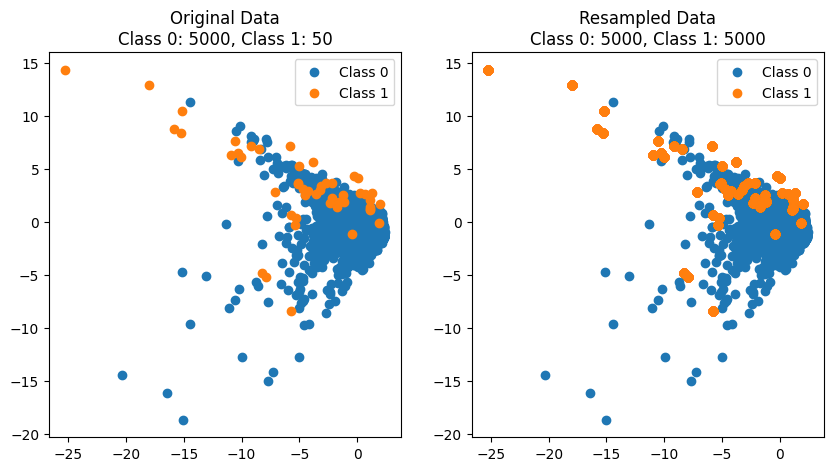

In [21]:
# Now you can plot your resampled data
compare_plots(X_resampled, y_resampled, X, y)

In [22]:
# if fraud is spread through the data and not distinct, using nearest neighbors to create more fraud cases introduces noise into the data, as the nearest neighbors might not be fraud cases

In [23]:
from imblearn.over_sampling import BorderlineSMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)


# Create a BorderlineSMOTE instance
method = BorderlineSMOTE(kind='borderline-1') # # The ‘borderline1’ variant of SMOTE, also known as Borderline-SMOTE1, is a specific method that only generates synthetic samples from a subset of the minority class instances that are considered in danger, meaning they are difficult to classify1.

# Apply resampling to the training data only
X_resampled, y_resampled = method.fit_resample(X_train, y_train) 

# Continue fitting the model and obtain predictions
model = LogisticRegression()
model.fit(X_resampled, y_resampled)

# Get model performance metrics
predicted = model.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1004
           1       0.50      0.83      0.62         6

    accuracy                           0.99      1010
   macro avg       0.75      0.91      0.81      1010
weighted avg       1.00      0.99      0.99      1010



In [24]:
# Run the prep_data function
X, y = prep_data(df)
X.shape, y.shape

((5050, 28), (5050,))

In [25]:
# Define the resampling method
method = SMOTE()

# Create the resampled feature set
X_resampled, y_resampled = method.fit_resample(X, y)

X_resampled.shape, y_resampled.shape

((10000, 28), (10000,))

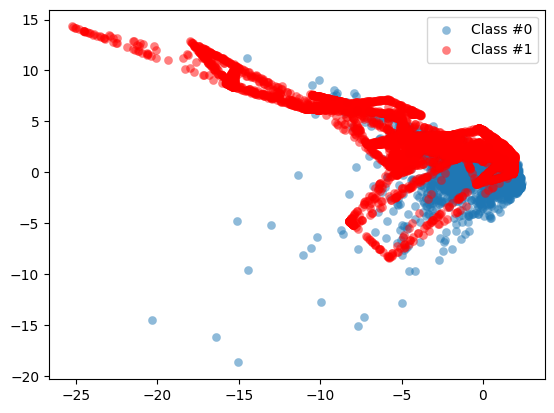

In [26]:
# Plot the resampled data
# The minority class is now much more prominently visible in our data. To see the results of SMOTE even better, we’ll compare it to the original data in the next exercise.

plot_data(X_resampled, y_resampled)


In [27]:
pd.value_counts(pd.Series(y))

0    5000
1      50
Name: count, dtype: int64

In [28]:
pd.value_counts(pd.Series(y_resampled))

0    5000
1    5000
Name: count, dtype: int64

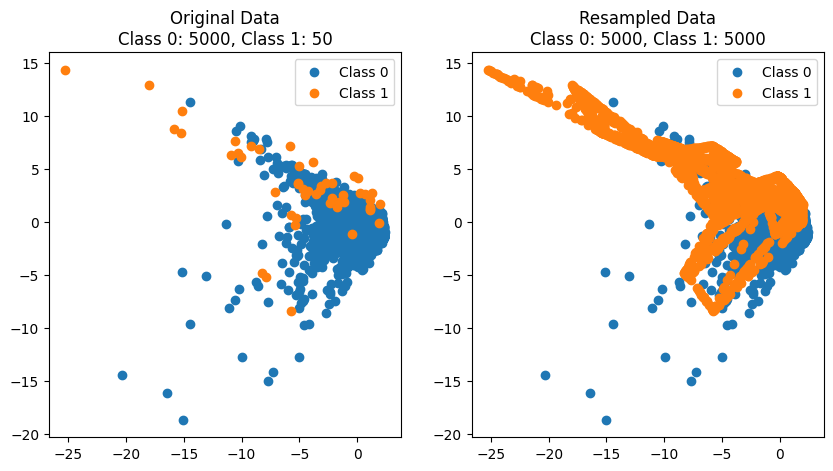

In [29]:
compare_plots(X_resampled, y_resampled, X, y)

In [30]:
# Fraud detection rules based limitations:

# Fixed threshold per rule and it’s difficult to determine the threshold; they don’t adapt over time
# Limited to yes / no outcomes, whereas ML yields a probability
# probability allows for fine-tuning the outcomes (i.e. rate of occurences of false positives and false negatives)
# Fails to capture interaction between features
# Ex. Size of the transaction only matters in combination to the frequency

# ML Based Fraud detection advantages:
    
# Adapt to the data, thus can change over time
# Uses all the data combined, rather than a threshold per feature
# Produces a probability, rather than a binary score
# Typically have better performance and can be combined with rules

In [31]:
# Step 1: split the features and labels into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Step 2: Define which model to use
model = LinearRegression()

# Step 3: Fit the model to the training data
model.fit(X_train, y_train)

# Step 4: Obtain model predictions from the test data
y_predicted = model.predict(X_test)

# Step 5: Compare y_test to predictions and obtain performance metrics (r^2 score)
r2_score(y_test, y_predicted)

0.5684372731684444

In [32]:
# In your results, y_predicted is an array of these predicted probabilities. A higher value means that the model thinks it’s more likely that the corresponding instance is a fraud. However, because linear regression isn’t naturally bounded between 0 and 1, these “probabilities” can sometimes fall outside this range, which can make them harder to interpret.

# The r2_score is a measure of how well the predicted values fit the actual values. In the context of binary classification, it’s not typically used, because it doesn’t capture the performance of the model in a meaningful way. For example, it doesn’t tell you how well the model is able to distinguish between the two classes

y_predicted, r2_score(y_test, y_predicted)

(array([ 0.01205037,  0.02209974,  0.00050215, ..., -0.00313696,
        -0.0038524 ,  0.00297675]),
 0.5684372731684444)

In [ ]:
# Exploring the traditional method of fraud detection
# In this exercise you’re going to try finding fraud cases in our credit card dataset the “old way”. First you’ll define threshold values using common statistics, to split fraud and non-fraud. Then, use those thresholds on your features to detect fraud. 

In [33]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [34]:
df.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.035030,0.011553,0.037444,-0.045760,-0.013825,-0.030885,0.014315,-0.022432,-0.002227,0.001667,-0.004511,0.017434,0.004204,0.006542,-0.026640,0.001190,0.004481,-0.010892,-0.016554,-0.002896,-0.010583,-0.010206,-0.003305,-0.000918,-0.002613,-0.004651,-0.009584,0.002414,85.843714
1,-4.985211,3.321539,-7.293909,4.827952,-3.326587,-1.591882,-5.776541,1.395058,-2.537728,-5.917934,4.020563,-7.032865,-0.104179,-7.100399,-0.120265,-4.658854,-7.589219,-2.650436,0.894255,0.194580,0.703182,0.069065,-0.088374,-0.029425,-0.073336,-0.023377,0.380072,0.009304,113.469000


In [36]:
df['flag_as_fraud'] = np.where(np.logical_and(df.V1 < -3, df.V3 < -5), 1, 0)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,flag_as_fraud
0,1.725265,-1.337256,-1.012687,-0.361656,-1.431611,-1.098681,-0.842274,-0.026594,-0.032409,0.215113,1.618952,-0.654046,-1.442665,-1.546538,-0.230008,1.785539,1.419793,0.071666,0.233031,0.275911,0.414524,0.793434,0.028887,0.419421,-0.367529,-0.155634,-0.015768,0.010790,189.00,0,0
1,0.683254,-1.681875,0.533349,-0.326064,-1.455603,0.101832,-0.520590,0.114036,-0.601760,0.444011,1.521570,0.499202,-0.127849,-0.237253,-0.752351,0.667190,0.724785,-1.736615,0.702088,0.638186,0.116898,-0.304605,-0.125547,0.244848,0.069163,-0.460712,-0.017068,0.063542,315.17,0,0
2,1.067973,-0.656667,1.029738,0.253899,-1.172715,0.073232,-0.745771,0.249803,1.383057,-0.483771,-0.782780,0.005242,-1.273288,-0.269260,0.091287,-0.347973,0.495328,-0.925949,0.099138,-0.083859,-0.189315,-0.426743,0.079539,0.129692,0.002778,0.970498,-0.035056,0.017313,59.98,0,0
3,0.119513,0.729275,-1.678879,-1.551408,3.128914,3.210632,0.356276,0.920374,-0.160589,-0.801748,0.137341,-0.156740,-0.429388,-0.752392,0.155272,0.215068,0.352222,-0.376168,-0.398920,0.043715,-0.335825,-0.906171,0.108350,0.593062,-0.424303,0.164201,0.245881,0.071029,0.89,0,0
4,1.271253,0.275694,0.159568,1.003096,-0.128535,-0.608730,0.088777,-0.145336,0.156047,0.022707,-0.963306,-0.228074,-0.324933,0.390609,1.065923,0.285930,-0.627072,0.170175,-0.215912,-0.147394,0.031958,0.123503,-0.174528,-0.147535,0.735909,-0.262270,0.015577,0.015955,6.53,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5045,1.118331,2.074439,-3.837518,5.448060,0.071816,-1.020509,-1.808574,0.521744,-2.032638,-2.732792,3.274075,-3.541687,-0.946820,-7.555729,-1.767005,-0.642333,-2.114429,0.183327,-1.177793,0.163513,0.289861,-0.172718,-0.021910,-0.376560,0.192817,0.114107,0.500996,0.259533,1.00,1,0
5046,-2.150855,2.187917,-3.430516,0.119476,-0.173210,0.290700,-2.808988,-2.679351,-0.556685,-4.485483,1.903999,-2.644219,-0.982273,-4.691151,-0.693080,-2.553251,-3.483436,-0.064852,1.490329,0.532145,-0.073205,0.561496,-0.075034,-0.437619,0.353841,-0.521339,0.144465,0.026588,50.00,1,0
5047,-7.139060,2.773082,-6.757845,4.446456,-5.464428,-1.713401,-6.485365,3.409395,-3.053493,-6.260706,2.394168,-6.163537,0.602851,-5.606346,0.206622,-6.525081,-11.408368,-4.693978,2.431274,-0.616949,1.303250,-0.016118,-0.876670,0.382230,-1.054624,-0.614606,-0.766848,0.409424,106.90,1,1
5048,-1.169203,1.863414,-2.515135,5.463681,-0.297971,1.364918,0.759219,-0.118861,-2.293921,-0.423784,2.375876,-3.244827,-0.556619,-5.152475,0.050906,-1.022045,-1.646505,0.126460,1.819013,-0.299374,-0.393090,-0.708692,0.471309,-0.078616,-0.544655,0.014777,-0.240930,-0.781055,324.59,1,0


In [37]:
pd.crosstab(df.Class, df.flag_as_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud'])


Flagged Fraud,0,1
Actual Fraud,,
0,4984,16
1,28,22


In [38]:
# Compare with logistic regression model results:

# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit a logistic regression model to our data
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Obtain model predictions
predicted = model.predict(X_test)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1505
           1       0.90      0.90      0.90        10

    accuracy                           1.00      1515
   macro avg       0.95      0.95      0.95      1515
weighted avg       1.00      1.00      1.00      1515

Confusion matrix:
 [[1504    1]
 [   1    9]]


In [ ]:
# Logistic regression with SMOTE (using pipeline)

In [39]:
# Define which resampling method and which ML model to use in the pipeline
# resampling = SMOTE(kind='borderline2')  # has been changed to BorderlineSMOTE

resampling = BorderlineSMOTE()
model = LogisticRegression(solver='liblinear')

pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

In [40]:
# Split your data X and y, into a training and a test set and fit the pipeline onto the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

pipeline.fit(X_train, y_train) 
predicted = pipeline.predict(X_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1505
           1       0.41      0.70      0.52        10

    accuracy                           0.99      1515
   macro avg       0.70      0.85      0.76      1515
weighted avg       0.99      0.99      0.99      1515

Confusion matrix:
 [[1495   10]
 [   3    7]]


In [41]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print(f'Accuracy Score:\n{accuracy_score(y_test, predicted)}')

Accuracy Score:
0.9986798679867986


In [42]:
# Calculate the natural BASELINE accuracy by dividing the non-fraud cases over the total observations.

df2 = pd.read_csv(cc2_file)
df2.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,221547,-1.191668,0.428409,1.640028,-1.848859,-0.870903,-0.204849,-0.385675,0.352793,-1.098301,-0.334597,-0.679089,-0.039671,1.372661,-0.732001,-0.344528,1.024751,0.380209,-1.087349,0.364507,0.051924,0.507173,1.292565,-0.467752,1.244887,0.697707,0.059375,-0.319964,-0.017444,27.44,0
1,184524,1.966614,-0.450087,-1.228586,0.142873,-0.150627,-0.543590,-0.076217,-0.108390,0.973310,-0.029903,0.279973,0.885685,-0.583912,0.322019,-1.065335,-0.340285,-0.385399,0.216554,0.675646,-0.190851,0.124055,0.564916,-0.039331,-0.283904,0.186400,0.192932,-0.039155,-0.071314,35.95,0
2,91201,1.528452,-1.296191,-0.890677,-2.504028,0.803202,3.350793,-1.633016,0.815350,-1.884692,1.465259,-0.188235,-0.976779,0.560550,-0.250847,0.936115,0.136409,-0.078251,0.355086,0.127756,-0.163982,-0.412088,-1.017485,0.129566,0.948048,0.287826,-0.396592,0.042997,0.025853,28.40,0
3,26115,-0.774614,1.100916,0.679080,1.034016,0.168633,0.874582,0.209454,0.770550,-0.558106,-0.165442,0.017562,0.285377,-0.818739,0.637991,-0.370124,-0.605148,0.275686,0.246362,1.331927,0.080978,0.011158,0.146017,-0.130401,-0.848815,0.005698,-0.183295,0.282940,0.123856,43.20,0
4,201292,-1.075860,1.361160,1.496972,2.242604,1.314751,0.272787,1.005246,0.132932,-1.558317,0.484216,-1.967998,-1.818338,-2.036184,0.346962,-1.161316,1.017093,-0.926787,0.183965,-2.102868,-0.354008,0.254485,0.530692,-0.651119,0.626389,1.040212,0.249501,-0.146745,0.029714,10.59,0


In [43]:
X, y = prep_data(df2)
print(f'X shape: {X.shape}\ny shape: {y.shape}')

X shape: (7300, 28)
y shape: (7300,)


In [44]:
X[0, :]

array([-1.19166848,  0.42840857,  1.640028  , -1.84885886, -0.87090297,
       -0.20484889, -0.38567545,  0.35279255, -1.09830131, -0.33459676,
       -0.67908873, -0.03967093,  1.37266082, -0.73200071, -0.34452813,
        1.02475103,  0.38020855, -1.08734881,  0.36450716,  0.05192363,
        0.50717344,  1.29256539, -0.46775226,  1.24488683,  0.69770685,
        0.05937504, -0.31996433, -0.01744443])

In [45]:
df2.Class.value_counts()


Class
0    7000
1     300
Name: count, dtype: int64

In [46]:
# Count the total number of observations from the length of y
total_obs = len(y)
total_obs

7300

In [47]:
# Count the total number of non-fraudulent observations 
non_fraud = [i for i in y if i == 0]
count_non_fraud = non_fraud.count(0)
count_non_fraud

7000

In [49]:
# This tells us that by doing nothing, we would be correct in 95.9% of the cases. 

percentage = count_non_fraud/total_obs * 100
print(f'{percentage:0.2f}%')

95.89%


In [50]:
# Split your data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [51]:
# Define the model as the random forest
model = RandomForestClassifier(random_state=5, n_estimators=20)

In [52]:
# Fit the model to our training set
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=5)

In [74]:
# Obtain predictions from the test data 
predicted = model.predict(X_test)
predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
accuracy_score(y_test, predicted)

0.9908675799086758

In [72]:
# import the methods
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted) # corresponds to the area under the precision-recall curve.
average_precision


0.7890461137036479

In [73]:
# Obtain precision and recall (first values for threshold=0: all positive predictions, and last value for threshold=1: all negative predictions)
precision, recall, thresholds = precision_recall_curve(y_test, predicted)
precision, recall, thresholds

(array([0.04155251, 0.98630137, 1.        ]),
 array([1.        , 0.79120879, 0.        ]),
 array([0, 1], dtype=int64))

In [75]:
# Obtain model probabilities
probs = model.predict_proba(X_test)
probs


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

Thresholds:  [2.   1.   0.95 0.9  0.85 0.7  0.5  0.4  0.35 0.3  0.25 0.2  0.15 0.1
 0.05 0.  ]


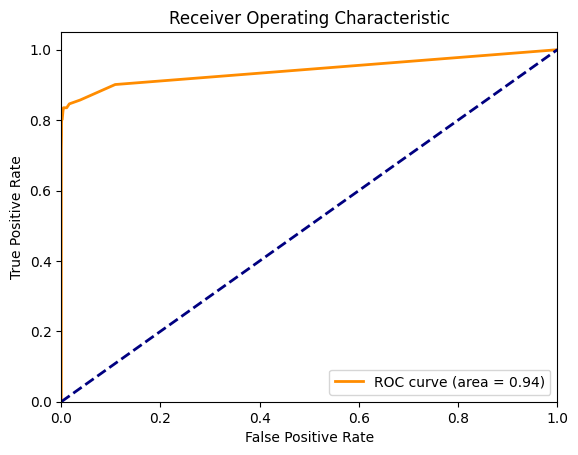

In [80]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_test, probs[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Let's print some thresholds as well
print("Thresholds: ", thresholds)

plt.show()


In [79]:
from sklearn.metrics import roc_auc_score

# Print ROC_AUC score using probabilities
print(roc_auc_score(y_test, probs[:, 1]))

0.9413718725295667


In [81]:
from sklearn.metrics import classification_report, confusion_matrix

# Obtain predictions
predicted = model.predict(X_test)

# Print classification report using predictions
print(classification_report(y_test, predicted))

# Print confusion matrix using predictions
print(confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.99      0.79      0.88        91

    accuracy                           0.99      2190
   macro avg       0.99      0.90      0.94      2190
weighted avg       0.99      0.99      0.99      2190

[[2098    1]
 [  19   72]]


In [83]:
# Obtain the predictions from our random forest model 
predicted = model.predict(X_test)
# Predict probabilities
probs = model.predict_proba(X_test)

# Print the ROC curve, classification report and confusion matrix
print('ROC Score:')
print(roc_auc_score(y_test, probs[:,1]))
print('\nClassification Report:')
print(classification_report(y_test, predicted))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predicted))

ROC Score:
0.9413718725295667

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.99      0.79      0.88        91

    accuracy                           0.99      2190
   macro avg       0.99      0.90      0.94      2190
weighted avg       0.99      0.99      0.99      2190


Confusion Matrix:
[[2098    1]
 [  19   72]]


In [84]:
# Plotting the Precision vs. Recall Curve
# Calculate average precision and the PR curve

average_precision = average_precision_score(y_test, predicted)
average_precision

0.7890461137036479

In [85]:
# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test, predicted)
print(f'Precision: {precision}\nRecall: {recall}')

Precision: [0.04155251 0.98630137 1.        ]
Recall: [1.         0.79120879 0.        ]


In [86]:
def plot_pr_curve(recall, precision, average_precision):
    """
    https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
    """
    from inspect import signature
    plt.figure()
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})

    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])
    plt.title(f'2-class Precision-Recall curve: AP={average_precision:0.2f}')
    return plt.show()

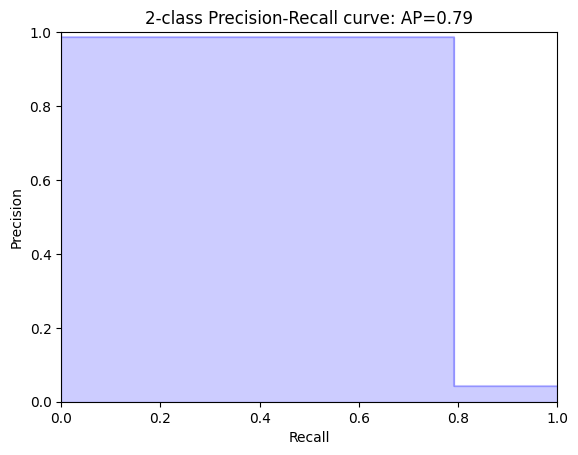

In [87]:
# Plot the recall precision tradeoff
plot_pr_curve(recall, precision, average_precision)

In [92]:
# define the ML model to be used
# put the model into GridSearchCV
# pass in param_grid
# frequency of cross-validation
# define a scoring metric to evaluate the models
# the default option is accuracy which isn’t optimal for fraud detection
# use precision, recall or f1

from sklearn.metrics import f1_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create the parameter grid 
param_grid = {'max_depth': [80, 90, 100, 110],
              'max_features': [2, 3],
              'min_samples_leaf': [3, 4, 5],
              'min_samples_split': [8, 10, 12],
              'n_estimators': [100, 200, 300, 1000]}

# Define which model to use
model = RandomForestClassifier()

# Define a counter for the iterations
iteration_counter = [0]
total_iterations = len(param_grid['max_depth']) * len(param_grid['max_features']) * len(param_grid['min_samples_leaf']) * len(param_grid['min_samples_split']) * len(param_grid['n_estimators']) * 5  # cv=5

# Define a custom scoring function
def custom_scorer(y_true, y_pred):
    iteration_counter[0] += 1
    print(f"Completed {iteration_counter[0]} out of {total_iterations} iterations")
    return f1_score(y_true, y_pred)

# Instantiate the grid search model
grid_search_model = GridSearchCV(estimator = model, 
                                 param_grid = param_grid, 
                                 cv = 5,
                                 n_jobs = -1, 
                                 scoring=make_scorer(custom_scorer))




In [93]:
# Fit the grid search to the data
grid_search_model.fit(X_train, y_train)

# Get the optimal parameters 
grid_search_model.best_params_

{'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 200}

In [96]:
# Get the best_estimator results
grid_search_model.best_estimator_


RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=3,
                       min_samples_split=12, n_estimators=200)

In [97]:
grid_search_model.best_score_

0.8956442623130684

In [98]:
# try class_weight='balanced_subsample' for imbalance

# Define the model with balanced subsample
model = RandomForestClassifier(class_weight='balanced_subsample', random_state=5, n_estimators=100)

# Fit your training model to your training set
model.fit(X_train, y_train)

# Obtain the predicted values and probabilities from the model 
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

# Print the ROC curve, classification report and confusion matrix
print('ROC Score:')
print(roc_auc_score(y_test, probs[:,1]))
print('\nClassification Report:')
print(classification_report(y_test, predicted))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predicted))

ROC Score:
0.9720746142851908

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.99      0.80      0.88        91

    accuracy                           0.99      2190
   macro avg       0.99      0.90      0.94      2190
weighted avg       0.99      0.99      0.99      2190


Confusion Matrix:
[[2098    1]
 [  18   73]]


In [106]:
# define weights manually, to be able to off-set that imbalance slightly. In our case we have 300 fraud to 7000 non-fraud cases, so by setting the weight ratio to 1:12, we get to a 1/3 fraud to 2/3 non-fraud ratio, which is good enough for training the model on.

y[y==0].shape, y[y==1].shape

((7000,), (300,))

In [107]:
def get_model_results(X_train: np.ndarray, y_train: np.ndarray,
                      X_test: np.ndarray, y_test: np.ndarray, model):
    """
    model: sklearn model (e.g. RandomForestClassifier)
    """
    # Fit your training model to your training set
    model.fit(X_train, y_train)

    # Obtain the predicted values and probabilities from the model 
    predicted = model.predict(X_test)
    
    try:
        probs = model.predict_proba(X_test)
        print('ROC Score:')
        print(roc_auc_score(y_test, probs[:,1]))
    except AttributeError:
        pass

    # Print the ROC curve, classification report and confusion matrix
    print('\nClassification Report:')
    print(classification_report(y_test, predicted))
    print('\nConfusion Matrix:')
    print(confusion_matrix(y_test, predicted))

In [108]:
# Change the weight option to set the ratio to 1 to 12 for the non-fraud and fraud cases, and set the split criterion to ‘entropy’.
# Set the maximum depth to 10.
# Set the minimal samples in leaf nodes to 10.
# Set the number of trees to use in the model to 20.

# Change the model options
model = RandomForestClassifier(bootstrap=True,
                               class_weight={0:1, 1:12},
                               criterion='entropy',
                               # Change depth of model
                               max_depth=10,
                               # Change the number of samples in leaf nodes
                               min_samples_leaf=10, 
                               # Change the number of trees to use
                               n_estimators=20,
                               n_jobs=-1,
                               random_state=5)

In [109]:
# Run the function get_model_results
get_model_results(X_train, y_train, X_test, y_test, model)

ROC Score:
0.9640174023213566

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.92      0.85      0.88        91

    accuracy                           0.99      2190
   macro avg       0.96      0.92      0.94      2190
weighted avg       0.99      0.99      0.99      2190


Confusion Matrix:
[[2092    7]
 [  14   77]]


In [110]:
# GridSearchCV

# Define in the parameter grid that you want to try 1 and 30 trees, and that you want to try the gini and entropy split criterion.
# Define the model to be simple RandomForestClassifier, you want to keep the random_state at 5 to be able to compare models.
# Set the scoring option such that it optimizes for recall.
# Fit the model to the training data X_train and y_train and obtain the best parameters for the model.

# Define the parameter sets to test
param_grid = {'n_estimators': [1, 30],
              'max_features': ['auto', 'log2'], 
              'max_depth': [4, 8, 10, 12],
              'criterion': ['gini', 'entropy']}

# Define the model to use
model = RandomForestClassifier(random_state=5)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)



In [111]:
# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)
CV_model.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 30}

In [114]:
# Input the optimal parameters in the model
model = RandomForestClassifier(class_weight={0:1,1:12},
                               criterion='gini',
                               max_depth=8,
                               max_features='log2', 
                               min_samples_leaf=10,
                               n_estimators=30,
                               n_jobs=-1,
                               random_state=5)

# Get results from your model
get_model_results(X_train, y_train, X_test, y_test, model)

ROC Score:
0.9669596720573377

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.96      0.85      0.90        91

    accuracy                           0.99      2190
   macro avg       0.98      0.92      0.95      2190
weighted avg       0.99      0.99      0.99      2190


Confusion Matrix:
[[2096    3]
 [  14   77]]


In [116]:
# Voting Classifier
# easy way of implementing an ensemble model, taking the average predictions of all three base models

# the voting='hard' option uses the predicted class labels and takes the majority vote
# the voting='soft' option takes the average probability by combining the predicted probabilities of the individual models
# Weights can be assigned to the VotingClassifer with weights=[2,1,1]
# Useful when one model significantly outperforms the others

from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB

# Define Models
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

# Combine models into ensemble
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

# Fit and predict as with other models
ensemble_model.fit(X_train, y_train)
ensemble_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [117]:
# checking models performances one by one

# Define the Logistic Regression model with weights
model = LogisticRegression(class_weight={0:1, 1:15}, random_state=5, solver='liblinear')

# Get the model results
get_model_results(X_train, y_train, X_test, y_test, model)

ROC Score:
0.9726295619578135

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2099
           1       0.65      0.88      0.75        91

    accuracy                           0.98      2190
   macro avg       0.82      0.93      0.87      2190
weighted avg       0.98      0.98      0.98      2190


Confusion Matrix:
[[2056   43]
 [  11   80]]


In [118]:
# Define the three classifiers to use in the ensemble
clf1 = LogisticRegression(class_weight={0:1, 1:15},
                          random_state=5,
                          solver='liblinear')

clf2 = RandomForestClassifier(class_weight={0:1, 1:12}, 
                              criterion='gini', 
                              max_depth=8, 
                              max_features='log2',
                              min_samples_leaf=10, 
                              n_estimators=30, 
                              n_jobs=-1,
                              random_state=5)

clf3 = DecisionTreeClassifier(random_state=5,
                              class_weight="balanced")

# Combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')

# Get the results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2099
           1       0.89      0.86      0.87        91

    accuracy                           0.99      2190
   macro avg       0.94      0.93      0.93      2190
weighted avg       0.99      0.99      0.99      2190


Confusion Matrix:
[[2089   10]
 [  13   78]]


In [119]:
# Define an ensemble method where you over weigh the second classifier (clf2) with 4 to 1 to the rest of the classifiers.
# Fit the model to the training and test set, and obtain the predictions predicted from the ensemble model.
# Print the performance metrics, this is ready for you to run.

# Define the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft', weights=[1, 4, 1], flatten_transform=True)

# Get results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

ROC Score:
0.9709961310723578

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.92      0.86      0.89        91

    accuracy                           0.99      2190
   macro avg       0.96      0.93      0.94      2190
weighted avg       0.99      0.99      0.99      2190


Confusion Matrix:
[[2092    7]
 [  13   78]]


In [ ]:
# Unsupervised fraud detection

In [120]:
banksim_df = pd.read_csv(banksim_file)
banksim_df.drop(['Unnamed: 0'], axis=1, inplace=True)
banksim_df

,age,gender,category,amount,fraud
0,3,F,es_transportation,49.7100,0
1,4,F,es_health,39.2900,0
2,3,F,es_transportation,18.7600,0
3,4,M,es_transportation,13.9500,0
4,2,M,es_transportation,49.8700,0
...,...,...,...,...,...
7195,5,M,es_hotelservices,236.1474,1
7196,5,F,es_hotelservices,139.6000,1
7197,1,F,es_travel,236.1474,1
7198,1,M,es_hotelservices,236.1474,1


In [121]:
banksim_adj_df = pd.read_csv(banksim_adj_file)
banksim_adj_df.drop(['Unnamed: 0'], axis=1, inplace=True)
banksim_adj_df

,age,amount,fraud,M,es_barsandrestaurants,es_contents,es_fashion,es_food,es_health,es_home,es_hotelservices,es_hyper,es_leisure,es_otherservices,es_sportsandtoys,es_tech,es_transportation,es_travel
0,3,49.7100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,4,39.2900,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,18.7600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4,13.9500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,49.8700,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7184,5,236.1474,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7185,5,139.6000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7186,1,236.1474,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7187,1,236.1474,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [123]:
banksim_df.shape, banksim_adj_df.shape

((7200, 5), (7189, 18))

In [124]:
banksim_df.groupby(['category'])[['amount', 'fraud']].mean()

,amount,fraud
category,,
es_barsandrestaurants,43.841793,0.022472
es_contents,55.170000,0.000000
es_fashion,59.780769,0.020619
es_food,35.216050,0.000000
es_health,126.604704,0.242798
es_home,120.688317,0.208333
es_hotelservices,172.756245,0.548387
es_hyper,46.788180,0.125000
es_leisure,229.757600,1.000000


In [129]:
banksim_df.groupby('category').agg({'amount': 'mean', 'fraud': ['mean', 'count']})

amount     fraud      
                             mean      mean count
category                                         
es_barsandrestaurants   43.841793  0.022472    89
es_contents             55.170000  0.000000    13
es_fashion              59.780769  0.020619    97
es_food                 35.216050  0.000000   294
es_health              126.604704  0.242798   243
es_home                120.688317  0.208333    24
es_hotelservices       172.756245  0.548387    31
es_hyper                46.788180  0.125000    80
es_leisure             229.757600  1.000000    13
es_otherservices       149.648960  0.600000    10
es_sportsandtoys       157.251737  0.657895    76
es_tech                132.852862  0.179487    39
es_transportation       27.422014  0.000000  5975
es_travel              231.818656  0.944444    18
es_wellnessandbeauty    66.167078  0.060606   198

In [130]:
banksim_df.groupby(['age'])[['amount', 'fraud']].mean()

,amount,fraud
age,,
0,49.468935,0.050000
1,35.622829,0.026648
2,37.228665,0.028718
3,37.279338,0.023283
4,36.197985,0.035966
5,37.547521,0.023990
6,36.700852,0.022293
U,39.117000,0.000000


In [131]:
# The average amount spent as well as fraud occurrence is rather similar across groups. Age group ‘0’ stands out but since there are only 40 cases, it does not make sense to split these out in a separate group and run a separate model on them.

banksim_df.groupby('age').agg({'amount': 'mean', 'fraud': ['mean', 'count']})

amount     fraud      
          mean      mean count
age                           
0    49.468935  0.050000    40
1    35.622829  0.026648   713
2    37.228665  0.028718  2333
3    37.279338  0.023283  1718
4    36.197985  0.035966  1279
5    37.547521  0.023990   792
6    36.700852  0.022293   314
U    39.117000  0.000000    11

In [132]:
# Create two dataframes with fraud and non-fraud data 

df_fraud = banksim_df[banksim_df.fraud == 1] 
df_non_fraud = banksim_df[banksim_df.fraud == 0]

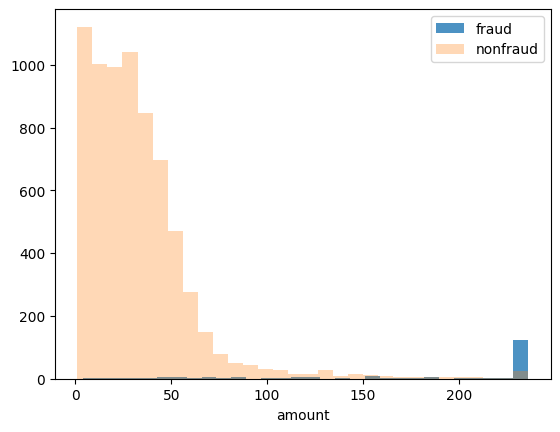

In [143]:
# Plot histograms of the amounts in fraud and non-fraud data 

# As the number fraud observations is much smaller, it is difficult to see the full distribution. Nonetheless, you can see that the fraudulent transactions tend to be on the larger side relative to normal observations.

plt.hist(df_fraud.amount, alpha=0.8, label='fraud', bins = 30)
plt.hist(df_non_fraud.amount, alpha=0.3, label='nonfraud', bins = 30)
plt.xlabel('amount')
plt.legend()
plt.show()

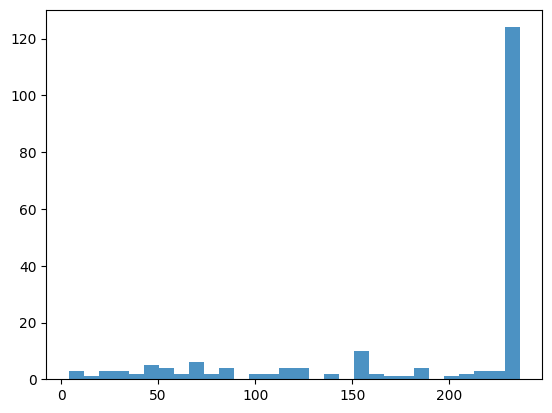

In [144]:
plt.hist(df_fraud.amount, alpha=0.8, label='fraud', bins = 30)
plt.show()

In [163]:
# Import the packages
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
df


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,flag_as_fraud
0,1.725265,-1.337256,-1.012687,-0.361656,-1.431611,-1.098681,-0.842274,-0.026594,-0.032409,0.215113,1.618952,-0.654046,-1.442665,-1.546538,-0.230008,1.785539,1.419793,0.071666,0.233031,0.275911,0.414524,0.793434,0.028887,0.419421,-0.367529,-0.155634,-0.015768,0.010790,189.00,0,0
1,0.683254,-1.681875,0.533349,-0.326064,-1.455603,0.101832,-0.520590,0.114036,-0.601760,0.444011,1.521570,0.499202,-0.127849,-0.237253,-0.752351,0.667190,0.724785,-1.736615,0.702088,0.638186,0.116898,-0.304605,-0.125547,0.244848,0.069163,-0.460712,-0.017068,0.063542,315.17,0,0
2,1.067973,-0.656667,1.029738,0.253899,-1.172715,0.073232,-0.745771,0.249803,1.383057,-0.483771,-0.782780,0.005242,-1.273288,-0.269260,0.091287,-0.347973,0.495328,-0.925949,0.099138,-0.083859,-0.189315,-0.426743,0.079539,0.129692,0.002778,0.970498,-0.035056,0.017313,59.98,0,0
3,0.119513,0.729275,-1.678879,-1.551408,3.128914,3.210632,0.356276,0.920374,-0.160589,-0.801748,0.137341,-0.156740,-0.429388,-0.752392,0.155272,0.215068,0.352222,-0.376168,-0.398920,0.043715,-0.335825,-0.906171,0.108350,0.593062,-0.424303,0.164201,0.245881,0.071029,0.89,0,0
4,1.271253,0.275694,0.159568,1.003096,-0.128535,-0.608730,0.088777,-0.145336,0.156047,0.022707,-0.963306,-0.228074,-0.324933,0.390609,1.065923,0.285930,-0.627072,0.170175,-0.215912,-0.147394,0.031958,0.123503,-0.174528,-0.147535,0.735909,-0.262270,0.015577,0.015955,6.53,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5045,1.118331,2.074439,-3.837518,5.448060,0.071816,-1.020509,-1.808574,0.521744,-2.032638,-2.732792,3.274075,-3.541687,-0.946820,-7.555729,-1.767005,-0.642333,-2.114429,0.183327,-1.177793,0.163513,0.289861,-0.172718,-0.021910,-0.376560,0.192817,0.114107,0.500996,0.259533,1.00,1,0
5046,-2.150855,2.187917,-3.430516,0.119476,-0.173210,0.290700,-2.808988,-2.679351,-0.556685,-4.485483,1.903999,-2.644219,-0.982273,-4.691151,-0.693080,-2.553251,-3.483436,-0.064852,1.490329,0.532145,-0.073205,0.561496,-0.075034,-0.437619,0.353841,-0.521339,0.144465,0.026588,50.00,1,0
5047,-7.139060,2.773082,-6.757845,4.446456,-5.464428,-1.713401,-6.485365,3.409395,-3.053493,-6.260706,2.394168,-6.163537,0.602851,-5.606346,0.206622,-6.525081,-11.408368,-4.693978,2.431274,-0.616949,1.303250,-0.016118,-0.876670,0.382230,-1.054624,-0.614606,-0.766848,0.409424,106.90,1,1
5048,-1.169203,1.863414,-2.515135,5.463681,-0.297971,1.364918,0.759219,-0.118861,-2.293921,-0.423784,2.375876,-3.244827,-0.556619,-5.152475,0.050906,-1.022045,-1.646505,0.126460,1.819013,-0.299374,-0.393090,-0.708692,0.471309,-0.078616,-0.544655,0.014777,-0.240930,-0.781055,324.59,1,0


In [164]:
# Transform and scale your data
X = np.array(df.iloc[:,:-2]).astype(np.float)
X.shape

(5050, 29)

In [165]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Define the k-means model and fit to the data
kmeans = KMeans(n_clusters=6, random_state=42).fit(X_scaled)

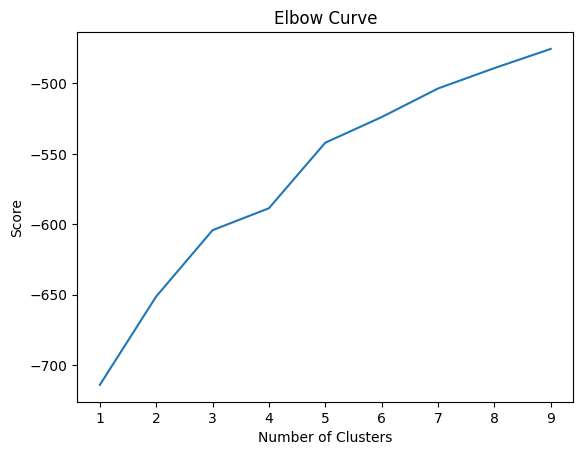

In [166]:
clust = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in clust]

score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]

plt.plot(clust,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [171]:
banksim_adj_df

,age,amount,fraud,M,es_barsandrestaurants,es_contents,es_fashion,es_food,es_health,es_home,es_hotelservices,es_hyper,es_leisure,es_otherservices,es_sportsandtoys,es_tech,es_transportation,es_travel
0,3,49.7100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,4,39.2900,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,18.7600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4,13.9500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,49.8700,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7184,5,236.1474,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7185,5,139.6000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7186,1,236.1474,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7187,1,236.1474,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [167]:
labels = banksim_adj_df.fraud
labels

0       0
1       0
2       0
3       0
4       0
       ..
7184    1
7185    1
7186    1
7187    1
7188    1
Name: fraud, Length: 7189, dtype: int64

In [168]:
cols = ['age', 'amount', 'M', 'es_barsandrestaurants', 'es_contents',
        'es_fashion', 'es_food', 'es_health', 'es_home', 'es_hotelservices',
        'es_hyper', 'es_leisure', 'es_otherservices', 'es_sportsandtoys',
        'es_tech', 'es_transportation', 'es_travel']

In [172]:
# Take the float values of df for X
X = banksim_adj_df[cols].values.astype(float)
print(X.shape)
X

(7189, 17)


array([[  3.    ,  49.71  ,   0.    , ...,   0.    ,   1.    ,   0.    ],
       [  4.    ,  39.29  ,   0.    , ...,   0.    ,   0.    ,   0.    ],
       [  3.    ,  18.76  ,   0.    , ...,   0.    ,   1.    ,   0.    ],
       ...,
       [  1.    , 236.1474,   0.    , ...,   0.    ,   0.    ,   1.    ],
       [  1.    , 236.1474,   1.    , ...,   0.    ,   0.    ,   0.    ],
       [  4.    , 236.1474,   0.    , ...,   0.    ,   0.    ,   0.    ]])

In [183]:
# Define the scaler and apply to the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape, X_scaled

((7189, 17),
 array([[0.5       , 0.20681002, 0.        , ..., 0.        , 1.        ,
         0.        ],
        [0.66666667, 0.16247858, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.5       , 0.07513457, 0.        , ..., 0.        , 1.        ,
         0.        ],
        ...,
        [0.16666667, 1.        , 0.        , ..., 0.        , 0.        ,
         1.        ],
        [0.16666667, 1.        , 1.        , ..., 0.        , 0.        ,
         0.        ],
        [0.66666667, 1.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]))

In [175]:
# Define the model 
kmeans = MiniBatchKMeans(n_clusters=8, random_state=0)

# Fit the model to the scaled data
kmeans.fit(X_scaled)

MiniBatchKMeans(random_state=0)

In [176]:
# Define the range of clusters to try
clustno = range(1, 10)

# Run MiniBatch Kmeans over the number of clusters
kmeans = [MiniBatchKMeans(n_clusters=i) for i in clustno]

# Obtain the score for each model
score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]
score

[-4361.855370016858,
 -2583.0643683266026,
 -1686.9642184940258,
 -1482.871293070094,
 -1380.5921471187828,
 -1141.8989639530841,
 -946.1623729101221,
 -940.3632074482201,
 -799.45854737409]

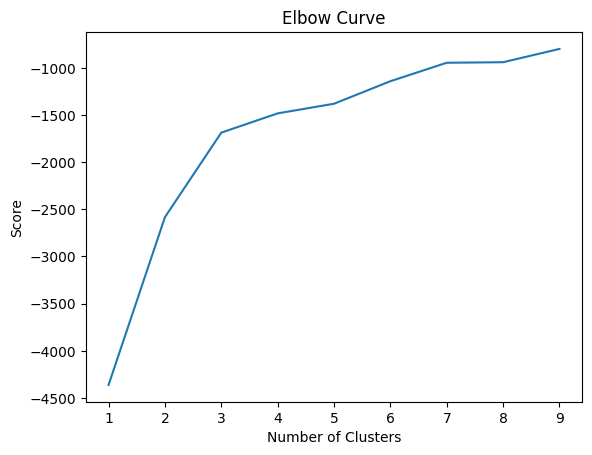

In [177]:
# Plot the models and their respective score 

# Now you can see that the optimal number of clusters should probably be at around 3 clusters, as that is where the elbow is in the curve. We’ll use this in the next exercise as our baseline model, and see how well this does in detecting fraud

plt.plot(clustno, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [180]:
# Take the outliers of each cluster, and flag those as fraud.
# Flagging Fraud Based on Distance to Centroid

# Run the kmeans model on scaled data
kmeans = KMeans(n_clusters=6, random_state=42).fit(X_scaled)

# Get the cluster number for each datapoint
X_clusters = kmeans.predict(X_scaled)
X_clusters.shape, X_clusters


((7189,), array([0, 4, 0, ..., 5, 2, 4]))

In [182]:
# Save the cluster centroids
X_clusters_centers = kmeans.cluster_centers_
X_clusters_centers.shape, X_clusters_centers


((6, 17),
 array([[ 4.92619926e-01,  1.11405513e-01, -1.16573418e-15,
         -5.20417043e-17, -2.60208521e-18, -3.81639165e-17,
          1.73472348e-16, -1.11022302e-16,  7.80625564e-18,
         -2.25514052e-17, -1.38777878e-17, -2.60208521e-18,
         -1.73472348e-18,  3.81639165e-17,  2.86229374e-17,
          1.00000000e+00, -1.12757026e-17],
        [ 4.98862344e-01,  1.45127052e-01,  4.06143345e-01,
          3.46944695e-18, -2.16840434e-19, -8.67361738e-18,
          1.00000000e+00, -1.38777878e-17, -1.30104261e-18,
         -8.67361738e-19, -5.20417043e-18, -2.16840434e-19,
         -6.50521303e-19,  5.20417043e-18, -1.73472348e-18,
         -4.44089210e-16,  8.67361738e-19],
        [ 4.91696323e-01,  3.64191237e-01,  1.00000000e+00,
          1.49466192e-01,  2.13523132e-02,  1.53024911e-01,
          0.00000000e+00,  0.00000000e+00,  3.20284698e-02,
          5.33807829e-02,  8.89679715e-02,  2.13523132e-02,
          2.13523132e-02,  8.89679715e-02,  7.11743772e-02,
  

In [186]:
# Calculate the distance to the cluster centroid for each point
dist = [np.linalg.norm(x-y) for x,y in zip(X_scaled, X_clusters_centers[X_clusters])]

len(dist)

7189

In [189]:
# Create predictions based on distance
km_y_pred = np.array(dist)
km_y_pred.shape, km_y_pred

((7189,),
 array([0.09568953, 0.57449169, 0.03701414, ..., 1.2301112 , 1.21484249,
        0.6397214 ]))

In [190]:
km_y_pred[dist>=np.percentile(dist, 93)] = 1
km_y_pred[dist<np.percentile(dist, 93)] = 0
km_y_pred

array([0., 0., 0., ..., 1., 1., 0.])

In [191]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels, test_size=0.3, random_state=0)

# Define K-means model 
kmeans = MiniBatchKMeans(n_clusters=3, random_state=42).fit(X_train)

# Obtain predictions and calculate distance from cluster centroid
X_test_clusters = kmeans.predict(X_test)
X_test_clusters_centers = kmeans.cluster_centers_
dist = [np.linalg.norm(x-y) for x, y in zip(X_test, X_test_clusters_centers[X_test_clusters])]

# Create fraud predictions based on outliers on clusters 
km_y_pred = np.array(dist)
km_y_pred[dist >= np.percentile(dist, 95)] = 1
km_y_pred[dist < np.percentile(dist, 95)] = 0

km_y_pred.shape, km_y_pred

((2157,), array([0., 0., 0., ..., 0., 0., 0.]))

In [363]:
percentiles = [0]+[np.percentile(dist, perc) for perc in range(90,99)]+[999]
percentiles 

[0,
 1.0458168621453459,
 1.0683966523779485,
 1.0846129310825836,
 1.1015166971249912,
 1.1190974499297555,
 1.1334342915211577,
 1.167326565545311,
 1.196284720827042,
 1.2224175577763368,
 999]

In [378]:
km_y_pred_tuple = [(dist[i],(j-1)/10) if dist[i] > percentiles[j-1] else (dist[i],999) for i in range(len(dist)) for j in range(10, 0, -1) if dist[i] <= percentiles[j]]
km_y_pred_tuple
km_y_pred_tuple_check = [km_y_pred_tuple[i] for i in range(len(km_y_pred_tuple)) if km_y_pred_tuple[i][1]==0.9]
km_y_pred_tuple_check

[(1.2506433144861362, 0.9),
 (1.36317294855671, 0.9),
 (1.2241680385017597, 0.9),
 (1.3941877674793384, 0.9),
 (1.3741863816541204, 0.9),
 (1.253932991656082, 0.9),
 (1.2600845374533818, 0.9),
 (1.305627419205151, 0.9),
 (1.240517623451424, 0.9),
 (1.3422729814491845, 0.9),
 (1.3496136932858154, 0.9),
 (1.375456405295798, 0.9),
 (1.3941877674793384, 0.9),
 (1.2844407357009289, 0.9),
 (1.375456405295798, 0.9),
 (1.2357727868097328, 0.9),
 (1.2765037179852914, 0.9),
 (1.2694338030531411, 0.9),
 (1.2224875466672223, 0.9),
 (1.282694600937007, 0.9),
 (1.301129833241468, 0.9),
 (1.2844528887749207, 0.9),
 (1.2581678624480668, 0.9),
 (1.2942635699154905, 0.9),
 (1.2844528887749207, 0.9),
 (1.253932991656082, 0.9),
 (1.368546949986248, 0.9),
 (1.2809110263049261, 0.9),
 (1.361922215109421, 0.9),
 (1.3348687681937788, 0.9),
 (1.365643947333364, 0.9),
 (1.248220398401006, 0.9),
 (1.245234150239585, 0.9),
 (1.3335098526331997, 0.9),
 (1.2451635343200749, 0.9),
 (1.3835424238222358, 0.9),
 (1.267

In [379]:
km_y_pred_perc = [(j-1)/10 if dist[i] > percentiles[j-1] else 999 for i in range(len(dist)) for j in range(10, 0, -1) if dist[i] <= percentiles[j]]
km_y_pred_perc_clean = [km_y_pred_perc[i] for i in range(len(km_y_pred_perc)) if km_y_pred_perc[i]!= 999]
km_y_pred_perc_clean = [km_y_pred_perc_clean[i] if km_y_pred_perc_clean[i]!=0 else 0.01 for i in range(len(km_y_pred_perc_clean))]

0.01    1941
0.90      44
0.20      22
0.50      22
0.70      22
0.30      22
0.10      21
0.80      21
0.60      21
0.40      21
Name: count, dtype: int64


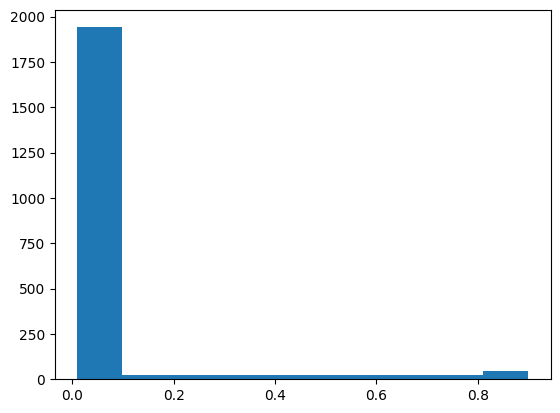

In [380]:
plt.hist(km_y_pred_perc_clean)
print(pd.Series(km_y_pred_perc_clean).value_counts())

In [192]:
def plot_confusion_matrix(cm, classes=['Not Fraud', 'Fraud'],
                          normalize=False,
                          title='Fraud Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    From:
        http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-
        examples-model-selection-plot-confusion-matrix-py
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [381]:
len(dist),len(y_test),len(km_y_pred),len(km_y_pred_perc_clean)

(2157, 2157, 2157, 2157)

In [384]:
# Obtain the ROC score
roc_auc_score(y_test, km_y_pred)

0.8197704982668266

In [383]:
roc_auc_score(y_test, km_y_pred_perc_clean)

0.9009503704555536

Confusion matrix, without normalization


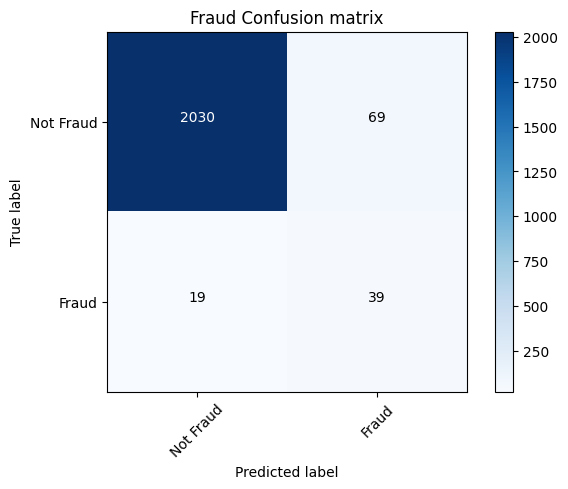

0.46987951807228917

In [419]:
# Create a confusion matrix
km_cm = confusion_matrix(y_test, km_y_pred)

# Plot the confusion matrix in a figure to visualize results 
plot_confusion_matrix(km_cm, normalize = False)

f1_score(y_test, km_y_pred, average='binary') 

In [431]:
km_y_pred_perc_calc = [1 if prob >= 0.9 else 0 for prob in km_y_pred_perc_clean ]

Confusion matrix, without normalization


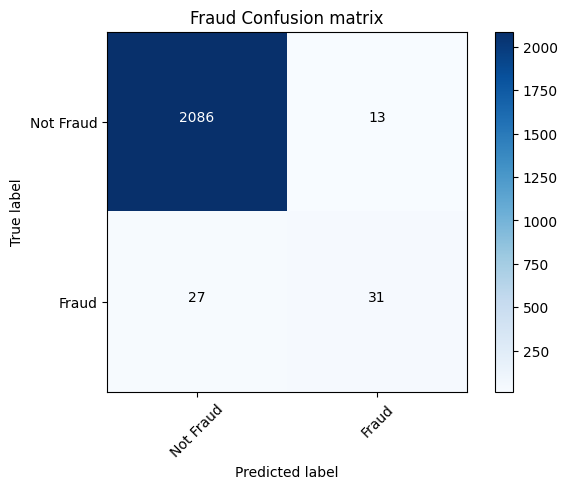

0.607843137254902

In [432]:
# Create a confusion matrix
km_cm_prob = confusion_matrix(y_test, km_y_pred_perc_calc)

# Plot the confusion matrix in a figure to visualize results 
plot_confusion_matrix(km_cm_prob, normalize = False)

f1_score(y_test, km_y_pred_perc_calc, average='binary') 

In [433]:
# DBSCAN

from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.5, min_samples=10, n_jobs=-1).fit(X_scaled)
db


DBSCAN(min_samples=10, n_jobs=-1)

In [439]:
# Get the cluster labels (aka numbers)
pred_labels = db.labels_
pred_labels


array([ 0,  1,  0, ..., 21,  9,  1], dtype=int64)

In [440]:
# Count the total number of clusters
# The labels include both positive integers (representing clusters) and the value -1 (representing noise points).

n_clusters_ = len(set(pred_labels)) - (1 if -1 in pred_labels else 0)

print(f'Estimated number of clusters: {n_clusters_}')

Estimated number of clusters: 22


In [445]:

print(f'Silhouette Coefficient: {silhouette_score(X_scaled, pred_labels):0.3f}')


Silhouette Coefficient: 0.712


In [451]:
# Calculate the counts for each unique cluster label (excluding noise points)
unique_labels, counts = np.unique(pred_labels[pred_labels >= 0], return_counts=True)
unique_labels, counts

# Create a list of tuples (cluster_number, count)
result = list(zip(unique_labels, counts))
result

[(0, 3252),
 (1, 145),
 (2, 2714),
 (3, 55),
 (4, 174),
 (5, 119),
 (6, 122),
 (7, 98),
 (8, 54),
 (9, 13),
 (10, 76),
 (11, 43),
 (12, 25),
 (13, 51),
 (14, 47),
 (15, 42),
 (16, 15),
 (17, 15),
 (18, 19),
 (19, 23),
 (20, 18),
 (21, 10)]

In [452]:
# Get sample counts in each cluster 
counts = np.bincount(pred_labels[pred_labels>=0])
print(counts)

[3252  145 2714   55  174  119  122   98   54   13   76   43   25   51
   47   42   15   15   19   23   18   10]


In [458]:
# Get sample counts in each cluster 
counts_labels = np.bincount(labels[labels>=0])
print(counts_labels)

[6989  200]


In [456]:
# Print performance metrics for DBscan
print(f'Estimated number of clusters: {n_clusters}')
print(f'Homogeneity: {homogeneity_score(labels, pred_labels):0.3f}')
print(f'Silhouette Coefficient: {silhouette_score(X_scaled, pred_labels):0.3f}')

Estimated number of clusters: 23
Homogeneity: 0.612
Silhouette Coefficient: 0.713


In [460]:
# Count observations in each cluster number
counts = np.bincount(pred_labels[pred_labels >= 0])

# Print the result
print(counts)

[3252  145 2714   55  174  119  122   98   54   15   76   15   43   25
   51   47   42   15   25   20   19   10]


In [467]:
np.argsort(counts)

array([21, 17,  9, 11, 20, 19, 18, 13, 16, 12, 15, 14,  8,  3, 10,  7,  5,
        6,  1,  4,  2,  0], dtype=int64)

In [470]:
unique_counts, indices = np.unique(counts, return_inverse=True)
unique_counts, indices

(array([  10,   15,   19,   20,   25,   42,   43,   47,   51,   54,   55,
          76,   98,  119,  122,  145,  174, 2714, 3252], dtype=int64),
 array([18, 15, 17, 10, 16, 13, 14, 12,  9,  1, 11,  1,  6,  4,  8,  7,  5,
         1,  4,  3,  2,  0], dtype=int64))

In [475]:
# Sort the sample counts of the clusters and take the top 3 smallest clusters
smallest_clusters = np.argsort(counts)[:4]
smallest_clusters

array([21, 17,  9, 11], dtype=int64)

In [476]:
# Print the counts of the smallest clusters only
print(f'Their counts are: {counts[smallest_clusters]}')

Their counts are: [10 15 15 15]


In [477]:
# Create a dataframe of the predicted cluster numbers and fraud labels 
df = pd.DataFrame({'clusternr':pred_labels,'fraud':labels})

df

,clusternr,fraud
0,0,0
1,1,0
2,0,0
3,2,0
4,2,0
...,...,...
7184,9,1
7185,11,1
7186,21,1
7187,9,1


In [478]:
# Create a condition flagging fraud for the smallest clusters 
df['predicted_fraud'] = np.where((df['clusternr'].isin([21, 17, 9, 11])), 1 , 0)
df

,clusternr,fraud,predicted_fraud
0,0,0,0
1,1,0,0
2,0,0,0
3,2,0,0
4,2,0,0
...,...,...,...
7184,9,1,1
7185,11,1,1
7186,21,1,1
7187,9,1,1


In [479]:
# Run a crosstab on the results 
print(pd.crosstab(df['fraud'], df['predicted_fraud'], rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

Flagged Fraud     0   1
Actual Fraud           
0              6964  25
1               170  30


In [485]:
df = pd.read_csv(enron_emails_clean_file)
df

,Message-ID,From,To,Date,content,clean_content
0,<8345058.1075840404046.JavaMail.evans@thyme>,('advdfeedback@investools.com'),('advdfeedback@investools.com'),2002-01-29 23:20:55,INVESTools Advisory\nA Free Digest of Trusted ...,investools advisory free digest trusted invest...
1,<1512159.1075863666797.JavaMail.evans@thyme>,('richard.sanders@enron.com'),('richard.sanders@enron.com'),2000-09-20 19:07:00,----- Forwarded by Richard B Sanders/HOU/ECT o...,forwarded richard b sanders hou ect pm justin ...
2,<26118676.1075862176383.JavaMail.evans@thyme>,('m..love@enron.com'),('m..love@enron.com'),2001-10-30 16:15:17,hey you are not wearing your target purple shi...,hey wearing target purple shirt today mine wan...
3,<10369289.1075860831062.JavaMail.evans@thyme>,('leslie.milosevich@kp.org'),('leslie.milosevich@kp.org'),2002-01-30 17:54:18,Leslie Milosevich\n1042 Santa Clara Avenue\nAl...,leslie milosevich santa clara avenue alameda c...
4,<26728895.1075860815046.JavaMail.evans@thyme>,('rtwait@graphicaljazz.com'),('rtwait@graphicaljazz.com'),2002-01-30 19:36:01,"Rini Twait\n1010 E 5th Ave\nLongmont, CO 80501...",rini twait e th ave longmont co rtwait graphic...
...,...,...,...,...,...,...
2085,<19039088.1075851547721.JavaMail.evans@thyme>,('andy.zipper@enron.com'),('andy.zipper@enron.com'),2001-10-22 14:00:17,"i bot 1,000/d at 3.175 apr/oct02. put it again...",bot apr oct put digital gas x thanks
2086,<6813352.1075842016977.JavaMail.evans@thyme>,('andy.zipper@enron.com'),('andy.zipper@enron.com'),2002-01-25 17:39:38,I'm okay. How are you ?,okay
2087,<4833106.1075842022184.JavaMail.evans@thyme>,('tradersummary@syncrasy.com'),('tradersummary@syncrasy.com'),2002-02-01 16:15:17,\n[IMAGE]=09\n\n\n[IMAGE] [IMAGE][IMAGE][IMAGE...,image image image image image image image imag...
2088,<3550151.1075842023814.JavaMail.evans@thyme>,('lmrig@qwest.net'),('lmrig@qwest.net'),2002-01-29 02:01:00,\n\nTransmission Expansion and Systems in Tran...,transmission expansion systems transition conf...


In [489]:
# Word Search

# Using a string operator to find words
df['clean_content'].str.contains('money laundering').value_counts()


clean_content
False    2085
True        1
Name: count, dtype: int64

In [490]:
 # Select data that matches 
df.loc[df['clean_content'].str.contains('money laundering', na=False)]


,Message-ID,From,To,Date,content,clean_content
271,<23032920.1075840296638.JavaMail.evans@thyme>,('rosalee.fleming@enron.com'),('rosalee.fleming@enron.com'),2001-03-23 07:05:00,Nancy Sheed <nancy_sheed@BUSINESSWEEK.COM> on ...,nancy sheed nancy sheed businessweek com pm pl...


In [491]:
 # Create a list of words to search for
list_of_words = ['police', 'money laundering']
df.loc[df['clean_content'].str.contains('|'.join(list_of_words), na=False)]



,Message-ID,From,To,Date,content,clean_content
154,<6336501.1075841154311.JavaMail.evans@thyme>,('sarah.palmer@enron.com'),('sarah.palmer@enron.com'),2002-02-01 14:53:35,\nJoint Venture: A 1997 Enron Meeting Belies O...,joint venture enron meeting belies officers cl...
211,<15161873.1075840333116.JavaMail.evans@thyme>,('opinionjournal@wsj.com'),('opinionjournal@wsj.com'),2002-01-14 21:44:48,From http://OpinionJournal.com\n\nBest of th...,http opinionjournal com best web today january...
265,<8804305.1075843407724.JavaMail.evans@thyme>,('ann.schmidt@enron.com'),('ann.schmidt@enron.com'),2001-03-29 08:00:00,US-Based Enron Corp Expands Pulp And Paper Ops...,us based enron corp expands pulp paper ops asi...
271,<23032920.1075840296638.JavaMail.evans@thyme>,('rosalee.fleming@enron.com'),('rosalee.fleming@enron.com'),2001-03-23 07:05:00,Nancy Sheed <nancy_sheed@BUSINESSWEEK.COM> on ...,nancy sheed nancy sheed businessweek com pm pl...
383,<8004159.1075855852710.JavaMail.evans@thyme>,('shona.wilson@enron.com'),('shona.wilson@enron.com'),2000-10-11 11:48:00,"Dear Mike,\n\nThanks for your insight. In the...",dear mike thanks insight past months establish...
442,<19511364.1075853114036.JavaMail.evans@thyme>,('jordan.w.cowman@bakernet.com'),('jordan.w.cowman@bakernet.com'),2001-07-02 14:24:16,I am pleased to send you our web-based e-mail ...,pleased send web based e mail alert prepared b...
1196,<20882659.1075845226215.JavaMail.evans@thyme>,('clickz.today.txt@my.clickz.com'),('clickz.today.txt@my.clickz.com'),2001-06-07 16:30:14,||||||||||||||||||||||||||||||||||||||||||||||...,c l c k z thursday june internet leading resou...
1228,<14494563.1075861149693.JavaMail.evans@thyme>,('txbarnesj@aol.com'),('txbarnesj@aol.com'),2002-01-22 17:33:33,"Well Neighbors,\nIt has happened to us as well...",well neighbors happened us well guest staying ...
1782,<15663798.1075858728962.JavaMail.evans@thyme>,('cp-del@nationaljournal.com'),('cp-del@nationaljournal.com'),2001-10-24 22:40:08,National Journal's CongressDaily\nIssue date: ...,national journal congressdaily issue date octo...


In [493]:
 # Create a fraud flag 
df['flag'] = np.where((df['clean_content'].str.contains('|'.join(list_of_words)) == True), 1, 0)
df

,Message-ID,From,To,Date,content,clean_content,flag
0,<8345058.1075840404046.JavaMail.evans@thyme>,('advdfeedback@investools.com'),('advdfeedback@investools.com'),2002-01-29 23:20:55,INVESTools Advisory\nA Free Digest of Trusted ...,investools advisory free digest trusted invest...,0
1,<1512159.1075863666797.JavaMail.evans@thyme>,('richard.sanders@enron.com'),('richard.sanders@enron.com'),2000-09-20 19:07:00,----- Forwarded by Richard B Sanders/HOU/ECT o...,forwarded richard b sanders hou ect pm justin ...,0
2,<26118676.1075862176383.JavaMail.evans@thyme>,('m..love@enron.com'),('m..love@enron.com'),2001-10-30 16:15:17,hey you are not wearing your target purple shi...,hey wearing target purple shirt today mine wan...,0
3,<10369289.1075860831062.JavaMail.evans@thyme>,('leslie.milosevich@kp.org'),('leslie.milosevich@kp.org'),2002-01-30 17:54:18,Leslie Milosevich\n1042 Santa Clara Avenue\nAl...,leslie milosevich santa clara avenue alameda c...,0
4,<26728895.1075860815046.JavaMail.evans@thyme>,('rtwait@graphicaljazz.com'),('rtwait@graphicaljazz.com'),2002-01-30 19:36:01,"Rini Twait\n1010 E 5th Ave\nLongmont, CO 80501...",rini twait e th ave longmont co rtwait graphic...,0
...,...,...,...,...,...,...,...
2085,<19039088.1075851547721.JavaMail.evans@thyme>,('andy.zipper@enron.com'),('andy.zipper@enron.com'),2001-10-22 14:00:17,"i bot 1,000/d at 3.175 apr/oct02. put it again...",bot apr oct put digital gas x thanks,0
2086,<6813352.1075842016977.JavaMail.evans@thyme>,('andy.zipper@enron.com'),('andy.zipper@enron.com'),2002-01-25 17:39:38,I'm okay. How are you ?,okay,0
2087,<4833106.1075842022184.JavaMail.evans@thyme>,('tradersummary@syncrasy.com'),('tradersummary@syncrasy.com'),2002-02-01 16:15:17,\n[IMAGE]=09\n\n\n[IMAGE] [IMAGE][IMAGE][IMAGE...,image image image image image image image imag...,0
2088,<3550151.1075842023814.JavaMail.evans@thyme>,('lmrig@qwest.net'),('lmrig@qwest.net'),2002-01-29 02:01:00,\n\nTransmission Expansion and Systems in Tran...,transmission expansion systems transition conf...,0


In [495]:
df = pd.read_csv(enron_emails_clean_file)
df

,Message-ID,From,To,Date,content,clean_content
0,<8345058.1075840404046.JavaMail.evans@thyme>,('advdfeedback@investools.com'),('advdfeedback@investools.com'),2002-01-29 23:20:55,INVESTools Advisory\nA Free Digest of Trusted ...,investools advisory free digest trusted invest...
1,<1512159.1075863666797.JavaMail.evans@thyme>,('richard.sanders@enron.com'),('richard.sanders@enron.com'),2000-09-20 19:07:00,----- Forwarded by Richard B Sanders/HOU/ECT o...,forwarded richard b sanders hou ect pm justin ...
2,<26118676.1075862176383.JavaMail.evans@thyme>,('m..love@enron.com'),('m..love@enron.com'),2001-10-30 16:15:17,hey you are not wearing your target purple shi...,hey wearing target purple shirt today mine wan...
3,<10369289.1075860831062.JavaMail.evans@thyme>,('leslie.milosevich@kp.org'),('leslie.milosevich@kp.org'),2002-01-30 17:54:18,Leslie Milosevich\n1042 Santa Clara Avenue\nAl...,leslie milosevich santa clara avenue alameda c...
4,<26728895.1075860815046.JavaMail.evans@thyme>,('rtwait@graphicaljazz.com'),('rtwait@graphicaljazz.com'),2002-01-30 19:36:01,"Rini Twait\n1010 E 5th Ave\nLongmont, CO 80501...",rini twait e th ave longmont co rtwait graphic...
...,...,...,...,...,...,...
2085,<19039088.1075851547721.JavaMail.evans@thyme>,('andy.zipper@enron.com'),('andy.zipper@enron.com'),2001-10-22 14:00:17,"i bot 1,000/d at 3.175 apr/oct02. put it again...",bot apr oct put digital gas x thanks
2086,<6813352.1075842016977.JavaMail.evans@thyme>,('andy.zipper@enron.com'),('andy.zipper@enron.com'),2002-01-25 17:39:38,I'm okay. How are you ?,okay
2087,<4833106.1075842022184.JavaMail.evans@thyme>,('tradersummary@syncrasy.com'),('tradersummary@syncrasy.com'),2002-02-01 16:15:17,\n[IMAGE]=09\n\n\n[IMAGE] [IMAGE][IMAGE][IMAGE...,image image image image image image image imag...
2088,<3550151.1075842023814.JavaMail.evans@thyme>,('lmrig@qwest.net'),('lmrig@qwest.net'),2002-01-29 02:01:00,\n\nTransmission Expansion and Systems in Tran...,transmission expansion systems transition conf...


In [500]:
mask = df['clean_content'].str.contains('sell enron stock', na=False)
mask

0       False
1       False
2       False
3       False
4       False
        ...  
2085    False
2086    False
2087    False
2088    False
2089    False
Name: clean_content, Length: 2090, dtype: bool

In [501]:
# Select the data from df using the mask
df[mask]

,Message-ID,From,To,Date,content,clean_content
154,<6336501.1075841154311.JavaMail.evans@thyme>,('sarah.palmer@enron.com'),('sarah.palmer@enron.com'),2002-02-01 14:53:35,\nJoint Venture: A 1997 Enron Meeting Belies O...,joint venture enron meeting belies officers cl...


In [510]:
pd.set_option('display.max_colwidth', None)

# df.drop(['content'],axis = 1, inplace=True)

# Create a list of terms to search for
searchfor = ['enron stock', 'sell stock', 'stock bonus', 'sell enron stock']

# Filter cleaned emails on searchfor list and select from df 
filtered_emails = df[df.clean_content.str.contains('|'.join(searchfor), na=False)]
filtered_emails.head(1)

Message-ID   
0  <8345058.1075840404046.JavaMail.evans@thyme>  \

                              From                               To   
0  ('advdfeedback@investools.com')  ('advdfeedback@investools.com')  \

                  Date   
0  2002-01-29 23:20:55  \

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [508]:
# Create flag variable where the emails match the searchfor terms
df['flag'] = np.where((df['clean_content'].str.contains('|'.join(searchfor)) == True), 1, 0)

# Count the values of the flag variable
count = df['flag'].value_counts()
print(count)

flag
0    1776
1     314
Name: count, dtype: int64


In [ ]:
# Cleaning your text data
# Must dos when working with textual data:

# Tokenization
# Split the text into sentences and the sentences in words
# transform everything to lowercase
# remove punctuation
# Remove all stopwords
# Lemmatize
# change from third person into first person
# change past and future tense verbs to present tense
# this makes it possible to combine all words that point to the same thing
# Stem the words
# reduce words to their root form
# e.g. walking and walked to walk

In [517]:
pd.set_option('display.max_colwidth', 100)

df = pd.read_csv(enron_emails_clean_file)
df

,Message-ID,From,To,Date,content,clean_content
0,<8345058.1075840404046.JavaMail.evans@thyme>,('advdfeedback@investools.com'),('advdfeedback@investools.com'),2002-01-29 23:20:55,INVESTools Advisory\nA Free Digest of Trusted Investment Advice\n\nTo unsubscribe from this free...,investools advisory free digest trusted investment advice unsubscribe free newsletter please see...
1,<1512159.1075863666797.JavaMail.evans@thyme>,('richard.sanders@enron.com'),('richard.sanders@enron.com'),2000-09-20 19:07:00,----- Forwarded by Richard B Sanders/HOU/ECT on 09/20/2000 07:07 PM -----\n\n\tJustin Boyd\n\t09...,forwarded richard b sanders hou ect pm justin boyd richard b sanders hou ect ect cc subject mg p...
2,<26118676.1075862176383.JavaMail.evans@thyme>,('m..love@enron.com'),('m..love@enron.com'),2001-10-30 16:15:17,hey you are not wearing your target purple shirt today are you? I have mine on and I don't want...,hey wearing target purple shirt today mine want look silly original message baumbach david sent ...
3,<10369289.1075860831062.JavaMail.evans@thyme>,('leslie.milosevich@kp.org'),('leslie.milosevich@kp.org'),2002-01-30 17:54:18,"Leslie Milosevich\n1042 Santa Clara Avenue\nAlameda, CA 94501\nleslie.milosevich@kp.org\n\nTo Mr...",leslie milosevich santa clara avenue alameda ca leslie milosevich kp org mr ken lay writing urge...
4,<26728895.1075860815046.JavaMail.evans@thyme>,('rtwait@graphicaljazz.com'),('rtwait@graphicaljazz.com'),2002-01-30 19:36:01,"Rini Twait\n1010 E 5th Ave\nLongmont, CO 80501\nrtwait@graphicaljazz.com\n\nTo Mr. Ken Lay,\n\nI...",rini twait e th ave longmont co rtwait graphicaljazz com mr ken lay writing urge donate millions...
...,...,...,...,...,...,...
2085,<19039088.1075851547721.JavaMail.evans@thyme>,('andy.zipper@enron.com'),('andy.zipper@enron.com'),2001-10-22 14:00:17,"i bot 1,000/d at 3.175 apr/oct02. put it against the digital in gas-x.\n\nthanks",bot apr oct put digital gas x thanks
2086,<6813352.1075842016977.JavaMail.evans@thyme>,('andy.zipper@enron.com'),('andy.zipper@enron.com'),2002-01-25 17:39:38,I'm okay. How are you ?,okay
2087,<4833106.1075842022184.JavaMail.evans@thyme>,('tradersummary@syncrasy.com'),('tradersummary@syncrasy.com'),2002-02-01 16:15:17,"\n[IMAGE]=09\n\n\n[IMAGE] [IMAGE][IMAGE][IMAGE][IMAGE][IMAGE][IMAGE][IMAGE] Syncrasy, =\n...",image image image image image image image image image syncrasy llc fax texas avenue suite h oust...
2088,<3550151.1075842023814.JavaMail.evans@thyme>,('lmrig@qwest.net'),('lmrig@qwest.net'),2002-01-29 02:01:00,"\n\nTransmission Expansion and Systems in Transition Conference\nFeb. 5-8, 2002, Miami, Florid...",transmission expansion systems transition conference feb miami florida overview conference exami...


In [518]:
# Data Preprocessing I
# Tokenizers divide strings into list of substrings
# nltk word tokenizer can be used to find the words and punctuation in a string
# it splits the words on whitespace, and separated the punctuation out

from nltk import word_tokenize
from nltk.corpus import stopwords 
import string

# 1. Tokenization
text = df.apply(lambda row: word_tokenize(row["content"]), axis=1)
text

0       [INVESTools, Advisory, A, Free, Digest, of, Trusted, Investment, Advice, To, unsubscribe, from, ...
1       [--, --, -, Forwarded, by, Richard, B, Sanders/HOU/ECT, on, 09/20/2000, 07:07, PM, --, --, -, Ju...
2       [hey, you, are, not, wearing, your, target, purple, shirt, today, are, you, ?, I, have, mine, on...
3       [Leslie, Milosevich, 1042, Santa, Clara, Avenue, Alameda, ,, CA, 94501, leslie.milosevich, @, kp...
4       [Rini, Twait, 1010, E, 5th, Ave, Longmont, ,, CO, 80501, rtwait, @, graphicaljazz.com, To, Mr., ...
                                                       ...                                                 
2085       [i, bot, 1,000/d, at, 3.175, apr/oct02, ., put, it, against, the, digital, in, gas-x, ., thanks]
2086                                                                     [I, 'm, okay, ., How, are, you, ?]
2087    [[, IMAGE, ], =09, [, IMAGE, ], [, IMAGE, ], [, IMAGE, ], [, IMAGE, ], [, IMAGE, ], [, IMAGE, ],...
2088    [Transmission, Expan

In [527]:

text = text.apply(lambda x: [word.rstrip() for word in x])

text

0       [INVESTools, Advisory, A, Free, Digest, of, Trusted, Investment, Advice, To, unsubscribe, from, ...
1       [--, --, -, Forwarded, by, Richard, B, Sanders/HOU/ECT, on, 09/20/2000, 07:07, PM, --, --, -, Ju...
2       [hey, you, are, not, wearing, your, target, purple, shirt, today, are, you, ?, I, have, mine, on...
3       [Leslie, Milosevich, 1042, Santa, Clara, Avenue, Alameda, ,, CA, 94501, leslie.milosevich, @, kp...
4       [Rini, Twait, 1010, E, 5th, Ave, Longmont, ,, CO, 80501, rtwait, @, graphicaljazz.com, To, Mr., ...
                                                       ...                                                 
2085       [i, bot, 1,000/d, at, 3.175, apr/oct02, ., put, it, against, the, digital, in, gas-x, ., thanks]
2086                                                                     [I, 'm, okay, ., How, are, you, ?]
2087    [[, IMAGE, ], =09, [, IMAGE, ], [, IMAGE, ], [, IMAGE, ], [, IMAGE, ], [, IMAGE, ], [, IMAGE, ],...
2088    [Transmission, Expan

In [529]:
# replace with lowercase
# text = re.sub(r'[^a-zA-Z]', ' ', text)

text = text.apply(lambda x: [word.lower() for word in x])

text

0       [investools, advisory, a, free, digest, of, trusted, investment, advice, to, unsubscribe, from, ...
1       [--, --, -, forwarded, by, richard, b, sanders/hou/ect, on, 09/20/2000, 07:07, pm, --, --, -, ju...
2       [hey, you, are, not, wearing, your, target, purple, shirt, today, are, you, ?, i, have, mine, on...
3       [leslie, milosevich, 1042, santa, clara, avenue, alameda, ,, ca, 94501, leslie.milosevich, @, kp...
4       [rini, twait, 1010, e, 5th, ave, longmont, ,, co, 80501, rtwait, @, graphicaljazz.com, to, mr., ...
                                                       ...                                                 
2085       [i, bot, 1,000/d, at, 3.175, apr/oct02, ., put, it, against, the, digital, in, gas-x, ., thanks]
2086                                                                     [i, 'm, okay, ., how, are, you, ?]
2087    [[, image, ], =09, [, image, ], [, image, ], [, image, ], [, image, ], [, image, ], [, image, ],...
2088    [transmission, expan

In [534]:
# text.apply(lambda x: [tuple(word) for word in x])


In [540]:
# Remove all stopwords
stop = set(stopwords.words('english'))
print(stop)

stop_free = text.apply(lambda x: " ".join([word for word in tuple(x) if ((word not in stop) and (not word.isdigit()))]))

stop_free

{'theirs', 'into', 'so', 'between', 'same', 'again', 'few', 'herself', 'we', 'are', 'didn', "you're", 'yourself', 'which', 'after', 'more', "couldn't", 'himself', 'being', 'but', 'through', 'yourselves', 'their', 'me', 'about', 'where', 'y', 'mustn', "you'll", "that'll", 'be', 'm', 've', "aren't", 'and', 'over', 'll', 'am', 'most', 'off', 'when', 'his', "you'd", 'hasn', 'an', 'couldn', 'down', 'then', "should've", "haven't", 't', 'under', "shan't", 'during', 'on', 'should', "weren't", 'haven', 'they', "mustn't", 'a', 'o', 'both', 'against', 'it', 'does', "you've", 'him', 'were', 'other', 'until', 'from', 'or', 'ours', 'each', 'what', 'once', 'needn', 'been', 'as', 'shan', "isn't", 'because', 'can', 'isn', 'i', "won't", 'have', 'any', 'shouldn', 'up', 'at', 'those', 'than', 'don', 'her', 'how', 'before', "she's", 'will', 'by', 'below', 'nor', "shouldn't", 'this', "hadn't", 'your', 'd', "doesn't", 'you', 'is', 'myself', 'whom', 'hers', 'won', "needn't", 're', 'do', "hasn't", 'these', 'fo

0       investools advisory free digest trusted investment advice unsubscribe free newsletter , please s...
1       -- -- - forwarded richard b sanders/hou/ect 09/20/2000 07:07 pm -- -- - justin boyd 09/19/2000 0...
2       hey wearing target purple shirt today ? mine n't want look silly -- -- -original message -- -- -...
3       leslie milosevich santa clara avenue alameda , ca leslie.milosevich @ kp.org mr. ken lay , 'm wr...
4       rini twait e 5th ave longmont , co rtwait @ graphicaljazz.com mr. ken lay , 'm writing urge dona...
                                                       ...                                                 
2085                                               bot 1,000/d 3.175 apr/oct02 . put digital gas-x . thanks
2086                                                                                            'm okay . ?
2087    [ image ] =09 [ image ] [ image ] [ image ] [ image ] [ image ] [ image ] [ image ] [ image ] sy...
2088    transmission expansi

In [543]:
exclude = set(string.punctuation)
print(exclude)
punc_free = stop_free.apply(lambda x: ''.join(word for word in x if word not in exclude))
punc_free

{')', '&', '@', '=', '%', '}', '{', '`', '(', ':', '/', '+', '#', ']', '^', "'", '_', '|', '~', '[', ',', '*', '<', '.', ';', '>', '?', '\\', '-', '$', '!', '"'}


0       investools advisory free digest trusted investment advice unsubscribe free newsletter  please se...
1          forwarded richard b sandershouect 09202000 0707 pm    justin boyd 09192000 0932  richard b sa...
2       hey wearing target purple shirt today  mine nt want look silly   original message     baumbach  ...
3       leslie milosevich santa clara avenue alameda  ca lesliemilosevich  kporg mr ken lay  m writing u...
4       rini twait e 5th ave longmont  co rtwait  graphicaljazzcom mr ken lay  m writing urge donate mil...
                                                       ...                                                 
2085                                                      bot 1000d 3175 aproct02  put digital gasx  thanks
2086                                                                                               m okay  
2087     image  09  image   image   image   image   image   image   image   image  syncrasy   llc  71322...
2088    transmission expansi

In [545]:
# Data Preprocessing II
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

# Lemmatize words
lemma = WordNetLemmatizer()
normalized = punc_free.apply(lambda x: " ".join(lemma.lemmatize(word) for word in x.split()))
normalized


0       investools advisory free digest trusted investment advice unsubscribe free newsletter please see...
1       forwarded richard b sandershouect 09202000 0707 pm justin boyd 09192000 0932 richard b sandersho...
2       hey wearing target purple shirt today mine nt want look silly original message baumbach david se...
3       leslie milosevich santa clara avenue alameda ca lesliemilosevich kporg mr ken lay m writing urge...
4       rini twait e 5th ave longmont co rtwait graphicaljazzcom mr ken lay m writing urge donate millio...
                                                       ...                                                 
2085                                                        bot 1000d 3175 aproct02 put digital gasx thanks
2086                                                                                                 m okay
2087    image 09 image image image image image image image image syncrasy llc 7132288470 7132284147 fax ...
2088    transmission expansi

In [547]:
# Stem words
porter= PorterStemmer()
cleaned_text = normalized.apply(lambda x: " ".join(porter.stem(token) for token in x.split()))
print (cleaned_text)

# ['philip','going','street','curious','hear','perspective','may','wish',
# 'offer','trading','floor','enron','stock','lower','joined','company',
# 'business','school','imagine','quite','happy','people','day','relate',
# 'somewhat','stock','around','fact','broke','day','ago','knowing',
# 'imagine','letting','event','get','much','taken','similar',
# 'problem','hope','everything','else','going','well','family','knee',
# 'surgery','yet','give','call','chance','later']

0       investool advisori free digest trust invest advic unsubscrib free newslett pleas see issu fri se...
1       forward richard b sandershouect 09202000 0707 pm justin boyd 09192000 0932 richard b sandershoue...
2       hey wear target purpl shirt today mine nt want look silli origin messag baumbach david sent tues...
3       lesli milosevich santa clara avenu alameda ca lesliemilosevich kporg mr ken lay m write urg dona...
4       rini twait e 5th ave longmont co rtwait graphicaljazzcom mr ken lay m write urg donat million do...
                                                       ...                                                 
2085                                                           bot 1000d 3175 aproct02 put digit gasx thank
2086                                                                                                 m okay
2087    imag 09 imag imag imag imag imag imag imag imag syncrasi llc 7132288470 7132284147 fax texa aven...
2088    transmiss expans sys

In [550]:
# Define stopwords to exclude
stop = set(stopwords.words('english'))
stop.update(("to", "cc", "subject", "http", "from", "sent", "ect", "u", "fwd", "www", "com", 'html'))

# Define punctuations to exclude and lemmatizer
exclude = set(string.punctuation)
print(exclude)

# Import the lemmatizer from nltk
lemma = WordNetLemmatizer()

def clean(text, stop):
    text = str(text).rstrip()
    stop_free = " ".join([i for i in text.lower().split() if((i not in stop) and (not i.isdigit()))])
    punc_free = ''.join(i for i in stop_free if i not in exclude)
    normalized = " ".join(lemma.lemmatize(i) for i in punc_free.split())      
    return normalized

{')', '&', '@', '=', '%', '}', '{', '`', '(', ':', '/', '+', '#', ']', '^', "'", '_', '|', '~', '[', ',', '*', '<', '.', ';', '>', '?', '\\', '-', '$', '!', '"'}


In [553]:
# Apply the function clean(text,stop) on each line of text data in our dataframe, and take the column df['clean_content'] for this.
# Clean the emails in df and print results

text_clean=[]
for text in df['clean_content']:
    text_clean.append(clean(text, stop).split()) 
    
text_clean[0]

['investools',
 'advisory',
 'free',
 'digest',
 'trusted',
 'investment',
 'advice',
 'unsubscribe',
 'free',
 'newsletter',
 'please',
 'see',
 'issue',
 'fried',
 'sell',
 'stock',
 'gain',
 'month',
 'km',
 'rowe',
 'january',
 'index',
 'confirms',
 'bull',
 'market',
 'aloy',
 'small',
 'cap',
 'advisor',
 'earns',
 'lbix',
 'compounding',
 'return',
 'pine',
 'tree',
 'pcl',
 'undervalued',
 'high',
 'yield',
 'bank',
 'put',
 'customer',
 'first',
 'aso',
 'word',
 'sponsor',
 'top',
 'wall',
 'street',
 'watcher',
 'ben',
 'zacks',
 'year',
 'year',
 'gain',
 'moving',
 'best',
 'brightest',
 'wall',
 'street',
 'big',
 'money',
 'machine',
 'earned',
 'ben',
 'zacks',
 'five',
 'year',
 'average',
 'annual',
 'gain',
 'start',
 'outperforming',
 'long',
 'term',
 'get',
 'zacks',
 'latest',
 'stock',
 'buylist',
 'free',
 'day',
 'trial',
 'investools',
 'c',
 'go',
 'zaks',
 'mtxtu',
 'zakstb',
 'investools',
 'advisory',
 'john',
 'brobst',
 'investools',
 'fried',
 'sell',

In [567]:
def get_list_shape(lst, shape=None):
    if shape is None:
        shape = []
    if isinstance(lst, list):
        shape.append(len(lst))
#         if len(lst) > 0:
        get_list_shape(lst[0], shape)
    return shape

In [572]:
get_list_shape(text_clean)

[2090, 1042]

In [576]:
text_clean[900]

['steve', 'thanx', 'vince']

In [585]:
from gensim import corpora

 # Create dictionary number of times a word appears
dictionary = corpora.Dictionary(text_clean)
dictionary


In [592]:
# Filter out (non)frequent words 
# filter out words that appear in less than 5 emails and keep only the 50000 most frequent words
dictionary.filter_extremes(no_below=5, keep_n=50000)
print(dictionary)

Dictionary<6324 unique tokens: ['account', 'accurate', 'acre', 'address', 'advice']...>


In [588]:

# Create corpus
# create the corpus, which for each email, counts the number of words and the count for each word (doc2bow)
corpus = [dictionary.doc2bow(text) for text in text_clean]
corpus[900]

[(1197, 1), (1949, 1)]

In [589]:

corpus_and_words = [(text, dictionary.doc2bow(text)) for text in text_clean]
corpus_and_words[900]

(['steve', 'thanx', 'vince'], [(1197, 1), (1949, 1)])

In [590]:
# Latent Dirichlet Allocation (LDA) with gensim
# Run the LDA model after cleaning the text date, and creating the dictionary and corpus
# Pass the corpus and dictionary into the model
# As with K-means, beforehand, pick the number of topics to obtain, even if there is uncertainty about what topics exist
# The calculated LDA model, will contain the associated words for each topic, and topic scores per email

import gensim

# Define the LDA model
# passes: The number of times the model should iterate over the entire corpus during training (15 passes in your case).
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 3, id2word=dictionary, passes=15)
ldamodel



In [591]:
# Print the three topics from the model with top words
# num_words parameter specifies the number of top words to display for each topic when printing the results of an LDA model

topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.013*"image" + 0.008*"company" + 0.006*"market" + 0.006*"new"')
(1, '0.053*"td" + 0.038*"net" + 0.037*"money" + 0.034*"tr"')
(2, '0.014*"pm" + 0.013*"message" + 0.012*"hou" + 0.010*"original"')


In [ ]:
# After training, the LDA model assigns each topic a set of words along with their associated probabilities.
# The decimal values you see represent the probability of a specific word being associated with a particular topic.
# For example, in the first topic, the words “image,” “company,” “market,” and “new” have probabilities of 0.013, 0.008, 0.006, and 0.006, respectively.

In [593]:
# Define the LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=5)

# Save the topics and top 5 words
topics = ldamodel.print_topics(num_words=5)

# Print the results
for topic in topics:
    print(topic)

(0, '0.011*"company" + 0.007*"market" + 0.006*"new" + 0.006*"said" + 0.005*"power"')
(1, '0.054*"image" + 0.014*"se" + 0.013*"ne" + 0.013*"sp" + 0.012*"energy"')
(2, '0.018*"pm" + 0.014*"hou" + 0.012*"message" + 0.011*"e" + 0.011*"corp"')
(3, '0.013*"development" + 0.007*"time" + 0.007*"get" + 0.006*"amazon" + 0.006*"email"')
(4, '0.061*"td" + 0.044*"net" + 0.041*"money" + 0.039*"tr" + 0.036*"width"')


In [602]:
# if ipython is > 7.16.1 results in DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
lda_display = gensimvis.prepare(ldamodel, corpus, dictionary, sort_topics=False)

# this does not display in the blog post, but will render correctly in a Jupyter Notebook
pyLDAvis.display(lda_display)

In [632]:
len(text_clean), len(corpus)

(2090, 2090)

In [627]:
for i in ldamodel[corpus][:10]:
    print(i)

[(0, 0.9364814), (3, 0.06275697)]
[(0, 0.33240464), (2, 0.28559732), (3, 0.38132936)]
[(2, 0.30099922), (3, 0.6823771), (4, 0.013498488)]
[(1, 0.9926989)]
[(1, 0.9925414)]
[(1, 0.98173064), (4, 0.012651644)]
[(0, 0.6310118), (2, 0.11314966), (3, 0.2537085)]
[(1, 0.9926564)]
[(2, 0.26823258), (3, 0.709708), (4, 0.017696492)]
[(1, 0.9924695)]


In [621]:
# import pandas as pd

# def get_topic_details(ldamodel, corpus):
#     """
#     Extracts dominant topic details from an LDA model.

#     Args:
#         ldamodel (gensim.models.ldamodel.LdaModel): Trained LDA model.
#         corpus (list of list of tuples): Document-term matrix (bag-of-words representation).

#     Returns:
#         pd.DataFrame: DataFrame containing dominant topic information for each document.
#             Columns: 'Dominant_Topic' (topic number), '% Score' (probability score).
#     """
#     # Initialize an empty list to store topic details (topic number and score)
#     topic_details = []
    
#     # Iterate over each document in the corpus
#     for i, row in enumerate(ldamodel[corpus]):
#         # Sort the topics by probability (in descending order)
#         row = sorted(row, key=lambda x: (x[1]), reverse=True)
        
#         # Process each topic in the sorted list
#         for j, (topic_num, prop_topic) in enumerate(row):
#             if j == 0:  # Dominant topic (highest probability)
#                 # Create a dictionary with topic details
#                 topic_info = {'Dominant_Topic': topic_num, '% Score': prop_topic}
#                 # Append the dictionary to the topic_details list
#                 topic_details.append(topic_info)
    
#     # Create a DataFrame from the list of dictionaries
#     topic_details_df = pd.DataFrame(topic_details)
#     return topic_details_df


In [635]:
def get_topic_details(ldamodel: LdaModel, corpus: List[List[Tuple[int, float]]]) -> pd.DataFrame:
    """
    Extracts the dominant topic for each document in the corpus using the LDA model,
    and returns a DataFrame with the dominant topic and its percentage contribution
    to each document.

    Parameters:
    - ldamodel: The trained LDA model from which to infer topics.
    - corpus: The document corpus, typically represented as a bag-of-words.

    Returns:
    - A pandas DataFrame with two columns: 'Dominant_Topic' and '% Score', indicating
      the dominant topic and its percentage contribution for each document in the corpus.
    """

    # Initialize an empty list to store each document's dominant topic and its score
    rows_list = []

    # Iterate directly through the corpus to process each document
    for row in ldamodel[corpus]:
        # Sort the topics in the document by their percentage contribution (descending)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        
        # Process only the most dominant topic (highest percentage)
        # Extract the topic number and its proportional contribution as the dominant topic
        topic_num, prop_topic = row[0]
        
        # Append the dominant topic number and its contribution percentage to the list
        rows_list.append([topic_num, prop_topic])

    # Convert the list of dominant topics and their scores into a DataFrame
    topic_details_df = pd.DataFrame(data=rows_list, columns=['Dominant_Topic', '% Score'])
    
    # Return the DataFrame containing the dominant topic and its percentage score for each document
    return topic_details_df

In [636]:
# Assuming you have already defined ldamodel and corpus
contents = pd.DataFrame({'Original text': text_clean})
contents.head()

,Original text
0,"[investools, advisory, free, digest, trusted, investment, advice, unsubscribe, free, newsletter,..."
1,"[forwarded, richard, b, sander, hou, pm, justin, boyd, richard, b, sander, hou, mg, plc, rudolph..."
2,"[hey, wearing, target, purple, shirt, today, mine, want, look, silly, original, message, baumbac..."
3,"[leslie, milosevich, santa, clara, avenue, alameda, ca, leslie, milosevich, kp, org, mr, ken, la..."
4,"[rini, twait, e, th, ave, longmont, co, rtwait, graphicaljazz, mr, ken, lay, writing, urge, dona..."


In [637]:
# Concatenate the topic details DataFrame with the contents DataFrame along columns (axis=1)
topic_details = pd.concat([get_topic_details(ldamodel, corpus), contents], axis=1)
topic_details.head()

,Dominant_Topic,% Score,Original text
0,0,0.936481,"[investools, advisory, free, digest, trusted, investment, advice, unsubscribe, free, newsletter,..."
1,3,0.381332,"[forwarded, richard, b, sander, hou, pm, justin, boyd, richard, b, sander, hou, mg, plc, rudolph..."
2,3,0.682378,"[hey, wearing, target, purple, shirt, today, mine, want, look, silly, original, message, baumbac..."
3,1,0.992698,"[leslie, milosevich, santa, clara, avenue, alameda, ca, leslie, milosevich, kp, org, mr, ken, la..."
4,1,0.992541,"[rini, twait, e, th, ave, longmont, co, rtwait, graphicaljazz, mr, ken, lay, writing, urge, dona..."


In [638]:
topic_details.sort_values(by=['% Score'], ascending=False).head(10).head()

,Dominant_Topic,% Score,Original text
149,0,0.999738,"[electricity, trading, build, oh, slowly, france, dow, jones, energy, service, india, dabhol, gu..."
2081,4,0.999581,"[unsubscribe, mailing, please, go, money, net, script, unsubscribe, prefer, send, email, unsubsc..."
478,0,0.999300,"[greeting, jeff, thanks, make, copy, bring, class, kindly, salvador, salvador, aceves, assistant..."
2087,1,0.999164,"[image, image, image, image, image, image, image, image, image, syncrasy, llc, fax, texas, avenu..."
1108,0,0.998832,"[thestreet, pf, market, detox, trade, wind, blowing, enron, south, peter, eavis, mailto, peavis,..."


In [640]:
# Create a flag with the np.where() function to flag all content that has topic 3 as a dominant topic with a 1, and 0 otherwise
# Create flag for text highest associated with topic 3

topic_details['flag'] = np.where((topic_details['Dominant_Topic'] == 3.0), 1, 0)
topic_details_1 = topic_details[topic_details.flag == 1]
topic_details_1.sort_values(by=['% Score'], ascending=False).head(10)

,Dominant_Topic,% Score,Original text,flag
2000,3,0.996923,"[raquel, nunes, thomas, auto, confirm, amazon, quelnunes, hotmail, order, amazon, date, wed, dec...",1
2057,3,0.993829,"[reservation, status, changed, detail, reservation, listed, assignment, ref, seller, code, tepc,...",1
2074,3,0.992992,"[dear, friend, hot, deal, value, one, opt, subscriber, hope, enjoy, benefit, effort, send, best,...",1
350,3,0.992028,"[hey, dave, noon, tomorrow, try, make, house, tomorrow, go, pick, club, parent, house, give, dir...",1
2001,3,0.991763,"[townsend, judith, g, selected, participate, mid, year, performance, management, process, feedba...",1
1628,3,0.991304,"[sander, richard, b, selected, participate, mid, year, performance, management, process, feedbac...",1
2035,3,0.990879,"[hello, greg, belated, congrats, new, post, enron, probably, read, sort, pool, going, would, get...",1
2026,3,0.988612,"[schedule, change, athletic, director, wally, groff, officially, signed, football, scheduling, c...",1
1675,3,0.986988,"[still, houston, heard, quite, enron, treating, going, london, well, well, work, stressful, cool...",1
653,3,0.983004,"[reservation, status, changed, received, see, attachment, assignment, ref, seller, code, azps, s...",1
